# Twitch - Exploratory Data Analysis and Visualization

*By- Shashank Shashikant Rao (ss5132) and Cyrus Dinyar Lala (cdl2141)*

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<p> 

To make sure our content, and analysis is not interrupted by large chunks of code, the Python/R scripts on this notebook are hidden 
by default. However, you can toggle this by clicking the button below.

</p>


<br/>


<form action="javascript:code_toggle()"><input type="submit" value="Toggle Show/Hide Code"></form>''')

In [2]:
from IPython.core.display import HTML
HTML("""
<style>

div.text_cell_render { /* Customize text cells */
font-family: 'Calibri';
font-size:1.2em;
line-height:1.4em;
padding-left:3em;
padding-right:3em;
}
</style>
""")


<p><img src="report-assets/twitch-logo.png"></p>


## 1. Introduction

We have chosen to analyze viewership data from the game streaming website Twitch.tv. Below, we outline why we picked this topic, how we obtained the data and some general terminology associated with Twitch.


### What is Twitch?

Twitch is a live-streaming website which focuses mainly on gaming videos, live game playthroughs, eSport competition coverage. Viewers typically watch the content live, or via videos available on demand.

Quoting wikipedia - *"The site primarily focuses on video gaming, including playthroughs of video games, broadcasts of eSports competitions, creative content, and more recently, music broadcasts. Content on the site can either be viewed live or via video on demand. The popularity of Twitch would eclipse that of its general-interest counterpart; in October 2013, the website had 45 million unique viewers, and by February 2014, it was considered the fourth largest source of peak Internet traffic in the United States." *

Read more about twitch on their official website <a href="https://www.twitch.tv/p/about">here</a>.

### Why Analyze Twitch Data?

We chose this topic because of our interest in gaming, as well as the fact that we wanted the experience of using a REST API to periodically pull data and generate our own data store using Amazon web services. Amazon bought Twitch for ~1 billion dollars, and we were very curious about some specific aspects of Twitch that we discuss below. We were also interested in analysing user behavior online and finding out how that changes over time. Another cool aspect of this analysis is that, all the data is collected LIVE as the games/gaming tournaments take place.

### General Terminology/Vocabulary

The gamers who broadcast live on twitch or share content have "**channels**". The videos/live **streams** are available on their channels. Channels could belong to individuals or eSports companies who could stream gaming competitions.

**Viewers** typically subscribe to/follow specific channels to receive notifications about when the channel is 'live' or streaming content.

There is a variety of content streamed on Twitch. Apart from gaming videos, the site also features Talk Shows, IRL (In Real Life) video blogs ('vlogs') etc. Some of the absurd (but great!) content we found on Twitch was a continuous loop of the popular TV show 'Power Rangers' and even some streams tagged 'Casino' which feature players playing different games such as Poker.


### Questions we are looking to answer:

* What are the most popular games on twitch during a given time period?


* What are the most popular channels?


* What genre of game gets the most viewers?


* How does viewership vary with time of day or external events like tournaments?


* How does a streamers quality (frame rate, video quality) affect viewership?


* What kind of games are trending upwards in popularity during a given time period?


* How does stream viewership vary by time/geography?


### Data Source

The data for this project was obtained by using the REST API provided by Twitch. They provide clear instructions on how to structure GET requests and they return the data in JSON format. Since the project required analysis of "LIVE" twitch data, we wrote a Python script to fetch required data. We then pushed this script onto an Amazon AWS EC2 instance. The script was executed every 10 minutes using a cron job. After data cleaning, the data was then stored in a MySQL database hosted on Amazon RDS (part of AWS). To perform the analysis, time series data for various streams/games/channels was fetched locally from the MySQL instance. 

We also performed ‘one time’ pulls/fetches to obtain game-specific information such as 'genre' from a game review site called giantbomb. 

The giantbomb API documentation can be found here: https://www.giantbomb.com/api/documentation

The documentation for the twitch API can be found here: https://dev.twitch.tv/docs

* Data Fetch/Cleanup code is located here: 
    - https://github.com/shashankrao/TwitchDataAnalysis/blob/master/notebooks-code/Giantbomb_Pull.ipynb
    - https://github.com/shashankrao/TwitchDataAnalysis/blob/master/notebooks-code/Giantbomb_Cleanup.ipynb
    - https://github.com/shashankrao/TwitchDataAnalysis/blob/master/notebooks-code/TwitchScraper.py

## 2. Team 

*Team Members: Shashank Shashikant Rao (ss5132) and Cyrus Dinyar Lala (cdl2141)*

This section outlines the split up of tasks for the different stages of the project. We tried to evenly distribute work between us or work on things together.

**Data Scraping and Cleaning & Initial work**:

We set up the ‘live’ part of our data collection by working together. At the same time we worked together on ideating questions, and wrangling the data. After initial discussion on the important questions we wanted to ask, we spent some time understanding what kind of data is required and what visualizations would be best suited for each.

**Split up of analysis work completed:**

*Cyrus*: 

- Analysed the Twitch API, and worked on formulating the REST queries. 


- Worked on getting the SQL setup properly (schema etc). Set up the SQL Query script/workflow to aggregate and fetch data.


- Worked on analyzing games that have upward trends.


- Exploratory data analysis in R.


- Analysing how fps and video height vary with channels.


- Generated heatmaps to show game stream viewership by day-of-week/hour-of-day. (in R) 



*Shashank:* 

- Worked on setting up instances on AWS (setup API key with Twitch) 


- Wrote python code to get/fetch the data. Did some data cleaning in Pandas (Python) and pushed data into SQL


- Worked on fetching game related data from Giantbomb. 


- Initial exploratory analysis of the game based genres.


- Setup the initial notebook with interoperability between R and Python.


- Generated Time-Series visualization in D3 along with Daylight-map.



*Worked together on:*

- Visualizing ranking of games.


- Looking at anomalies in 'Street Fighter V' viewership.


- Looking at 'GTA V' viewership.


- Analysing trends of how streamers reach 'peak' viewership.


- General Analysis

## 3. Analysis of Data Quality

Going by the definition of data quality, the section below looks at how well the data correctly represents the real-world construct i.e Twitch viewers and streamers. The data is directly fetched using Twitch’s REST API. To obtain the data we used a Twitch Identity created for this project (or 'api-key'). 

Our data comes in the form of 3 main tables. Each is indexed by timestamp at which the row was requested. One provides summary data for twitch as a whole, one provides data summarized by game for a set list of games that we created, and the third provides data on the top 100 active channels per game in our list at that timestamp.

Given the fact that we had to obtain the data from an external source which ‘produces’ data points at every instant, we have outlined the different aspects of data quality below.

 - **Inconsistency**

There might be some inconsistency in between the different types of data we have fetched from twitch. This might come from the fact that the data is obtained from different REST queries. We make efforts to handle the slight inconsistencies between tables, and also use aggregation to alleviate these issues. 



- **Incompleteness**

From the perspective of our analysis and visualizations, the data is not incomplete. It provides all the attributes we require, at 10 minute intervals.


- **Accuracy**

The accuracy of our data depends on the data provided by Twitch. Most probably, Twitch is doing some approximation/aggregation while providing viewer numbers and other stream related data such as FPS. 


- **Latency**

The data is fetched every 10 minutes. The entire data fetch is executed in sequence:
    * Fetch the top 100 games being streamed
    * Fetch the information about the top 100 streamers for a pre-defined set of games
    * Fetch overall summary.




- **Precision**

The data is precise to every 10 minutes. There may be variation in between 10 minute intervals that is not accounted for caused by delays in API requests or approximation from Twitch's end. Additionally, we use aggregation to get the amount of viewers per stream per hour, day etc. (we do not have unique viewer information available to us, only counts per channel or game at snapshots in time). Therefore, while this is not strictly accurate, it gives a good estimate of the amount of unique viewers per hour/day given the data available.



- **Missing / Unknown**

The data does have some missing or unknown values. But the attributes that are unknown are low priority/impact. Example fields missing: "is_playlist";"ch_broadcaster_language". We reduced missing values at the time of data collection, and only selected values relevant to our analysis from the REST API response.


In [3]:
# load libraries and set plot parameters
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.style.use('seaborn-darkgrid')
#plt.style.use('seaborn-whitegrid')


import math
import random
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import scipy as scipy
import datetime
import random
import matplotlib.dates as mdates
from collections import OrderedDict


import warnings
warnings.filterwarnings('ignore')

sole_value = lambda x : list(x)[0]


%load_ext rpy2.ipython


In [4]:
giantbombdf = pd.read_csv('dfWithGenre.csv')

In [5]:
df = pd.read_csv('twitch_games.csv')
df['time'] =pd.to_datetime(df['timestamp'],unit='s')

#### Data Storage:

* **Table 1: twitch_games**  - data aggregated by game per 10 mins


* **Table 2: twitch_streams** - data on top 100 streams per game per 10 mins


* **Table 3: twitch_summary** - data aggregated for all of twitch per 10 mins

Below we show the top few rows, summary statistics and rough looks at distributions of the variables in these tables.


In [6]:
print 'twitch_games'
df.head()

twitch_games


rownum   timestamp  rank                              name  popularity  \
0       1  1490664181     1                 League of Legends       90593   
1       2  1490664181     2  Counter-Strike: Global Offensive       57275   
2       3  1490664181     3     PLAYERUNKNOWN'S BATTLEGROUNDS       55221   
3       4  1490664181     4                            Dota 2       50747   
4       5  1490664181     5                    Dark Souls III       36097   

   game_id  giantbomb_id  viewers  channels                time  
0    21779         24024    90851      1710 2017-03-28 01:23:01  
1    32399         36113    56385       757 2017-03-28 01:23:01  
2   493057         54979    56034      1369 2017-03-28 01:23:01  
3    29595         32887    53063       304 2017-03-28 01:23:01  
4   490292         49884    35995       841 2017-03-28 01:23:01

In [7]:
dfBig = pd.read_csv('twitch_streams.csv', sep=";")
#add formatted time to data frame
dfBig['time'] =pd.to_datetime(dfBig['timestamp'],unit='s')

In [8]:
print 'twitch_streams'
dfBig.head()

twitch_streams


rownum        stream_game     timestamp  rank     stream_id  average_fps  \
0       1  League of Legends  1.490664e+09     1  2.489979e+10       61.442   
1       2  League of Legends  1.490664e+09     2  2.489823e+10       60.223   
2       3  League of Legends  1.490664e+09     3  2.490309e+10       60.000   
3       4  League of Legends  1.490664e+09     4  2.490135e+10       60.488   
4       5  League of Legends  1.490664e+09     5  2.490231e+10       30.000   

   viewers  video_height  delay            created_at         ...          \
0    13649        1080.0    0.0  2012-04-27T01:37:07Z         ...           
1     7348        1080.0    0.0  2015-05-15T21:46:20Z         ...           
2     6036         720.0    0.0  2013-12-15T03:19:39Z         ...           
3     4182        1080.0    0.0  2013-03-31T21:12:14Z         ...           
4     3855        1080.0    0.0  2013-06-17T19:41:17Z         ...           

     ch_channel_game ch_language  ch_channel_id  ch_channel_name  \
0  League of Legends          en     30080751.0        tsm_dyrus   
1  League of Legends          en     91137296.0  fate_twisted_na   
2  League of Legends          es     53256534.0       jovironebr   
3  League of Legends          en     41939266.0             gosu   
4  League of Legends          en     44882903.0          riotlan   

          ch_created_at         ch_updated_at ch_channel_delay   ch_views  \
0  2012-04-27T01:37:07Z  2017-03-28T01:04:18Z              NaN  187030692   
1  2015-05-15T21:46:20Z  2017-03-28T01:04:23Z              NaN   10016074   
2  2013-12-15T03:19:39Z  2017-03-28T01:04:08Z              NaN    6402212   
3  2013-03-31T21:12:14Z  2017-03-28T01:04:24Z              NaN   86700401   
4  2013-06-17T19:41:17Z  2017-03-28T01:04:24Z              NaN   25716311   

   ch_followers                time  
0       1217143 2017-03-28 01:23:01  
1        303899 2017-03-28 01:23:01  
2        168504 2017-03-28 01:23:01  
3       1184171 2017-03-28 01:23:01  
4        151214 2017-03-28 01:23:01  

[5 rows x 26 columns]

In [9]:
dfSummary = pd.read_csv('twitch_summary.csv', sep =';')
dfSummary['time'] =pd.to_datetime(dfSummary['timestamp'],unit='s')

In [10]:
print 'twitch_summary'
dfSummary.head()

twitch_summary


rownum  viewers  channels   timestamp                time
0       1   659179     27149  1490664182 2017-03-28 01:23:02
1       2   663898     27283  1490664603 2017-03-28 01:30:03
2       3   667020     27278  1490665202 2017-03-28 01:40:02
3       4   666742     27223  1490665802 2017-03-28 01:50:02
4       5   662805     27151  1490666402 2017-03-28 02:00:02

##### Summary Statistics and Distributions:

In [11]:
print 'twitch_games'

df.describe()

twitch_games


rownum     timestamp           rank     popularity  \
count  314500.000000  3.145000e+05  314500.000000  314500.000000   
mean   157250.500000  1.491608e+09      50.500000    6554.180938   
std     90788.474168  5.450512e+05      28.866116   18653.479591   
min         1.000000  1.490664e+09       1.000000       0.000000   
25%     78625.750000  1.491137e+09      25.750000     665.000000   
50%    157250.500000  1.491608e+09      50.500000    1339.000000   
75%    235875.250000  1.492080e+09      75.250000    3961.000000   
max    314500.000000  1.492553e+09     100.000000  417562.000000   

             game_id   giantbomb_id        viewers       channels  
count  314500.000000  314500.000000  314500.000000  314500.000000  
mean   261135.241103   34394.510203    6562.179281     155.612655  
std    220288.887038   18022.871934   18640.585504     304.243541  
min        73.000000       0.000000     165.000000       1.000000  
25%     27471.000000   21958.000000     672.000000      18.000000  
50%    313558.000000   38690.000000    1346.000000      51.000000  
75%    490382.000000   49642.000000    3966.000000     143.000000  
max    496670.000000   59152.000000  420384.000000    4809.000000

twitch_games


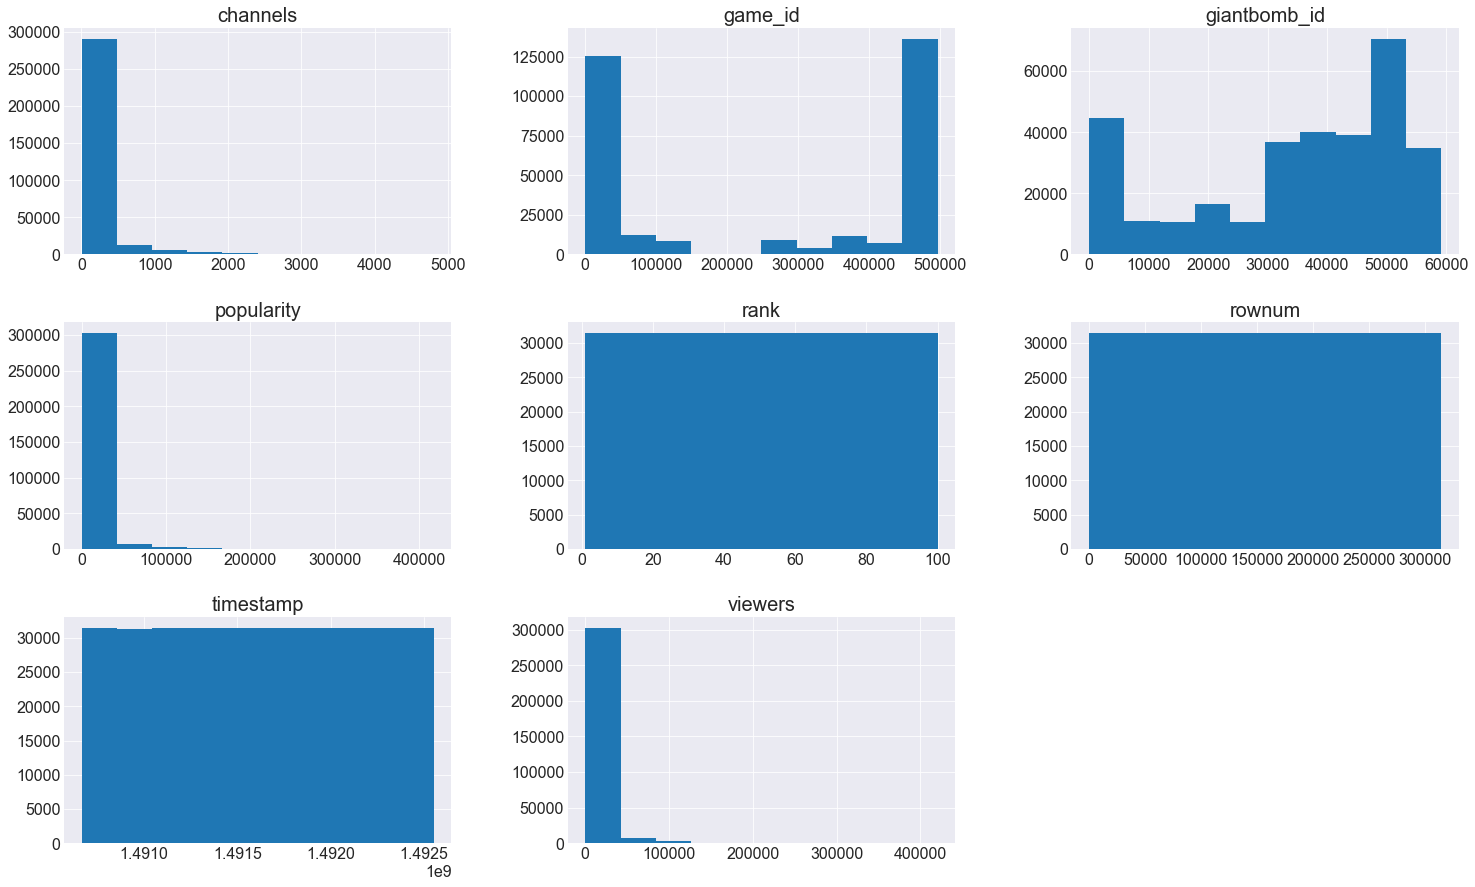

In [12]:
print 'twitch_games'

df.hist(figsize=(25,15))
plt.show()

In [13]:
print 'twitch_streams'
dfBig.describe()

twitch_streams


rownum     timestamp          rank     stream_id   average_fps  \
count  7.347098e+06  7.347098e+06  7.347098e+06  7.347098e+06  7.347098e+06   
mean   3.673550e+06  1.491588e+09  4.589175e+01  2.499021e+10  4.081056e+01   
std    2.120925e+06  5.494044e+05  2.730067e+01  5.227355e+07  1.457489e+01   
min    1.000000e+00  1.490664e+09  1.000000e+00  2.391212e+10  0.000000e+00   
25%    1.836775e+06  1.491113e+09  2.200000e+01  2.494673e+10  3.000000e+01   
50%    3.673550e+06  1.491568e+09  4.500000e+01  2.498769e+10  3.047600e+01   
75%    5.510324e+06  1.492094e+09  6.900000e+01  2.503658e+10  6.000000e+01   
max    7.347098e+06  1.492553e+09  1.000000e+02  2.508264e+10  1.000000e+03   

            viewers  video_height      delay   is_playlist     ch_mature  \
count  7.347098e+06  7.347098e+06  7347098.0  7.347098e+06  7.347098e+06   
mean   2.116097e+02  7.733090e+02        0.0  2.616135e-03  3.246419e-01   
std    1.663323e+03  1.679644e+02        0.0  5.108122e-02  4.682409e-01   
min    0.000000e+00  0.000000e+00        0.0  0.000000e+00  0.000000e+00   
25%    5.000000e+00  7.200000e+02        0.0  0.000000e+00  0.000000e+00   
50%    1.500000e+01  7.200000e+02        0.0  0.000000e+00  0.000000e+00   
75%    6.000000e+01  7.200000e+02        0.0  0.000000e+00  1.000000e+00   
max    2.694550e+05  2.160000e+03        0.0  1.000000e+00  1.000000e+00   

       ch_partner  ch_channel_id  ch_channel_delay      ch_views  ch_followers  
count   7347098.0   7.347098e+06               0.0  7.347098e+06  7.347098e+06  
mean          0.0   8.197888e+07               NaN  1.326328e+06  1.658142e+04  
std           0.0   4.064898e+07               NaN  9.903107e+06  8.201884e+04  
min           0.0   3.546000e+03               NaN  0.000000e+00  0.000000e+00  
25%           0.0   4.586588e+07               NaN  2.056000e+03  1.020000e+02  
50%           0.0   7.974966e+07               NaN  1.446400e+04  8.050000e+02  
75%           0.0   1.174447e+08               NaN  1.259498e+05  5.300000e+03  
max           0.0   1.538401e+08               NaN  8.902287e+08  2.320019e+06

twitch_streams


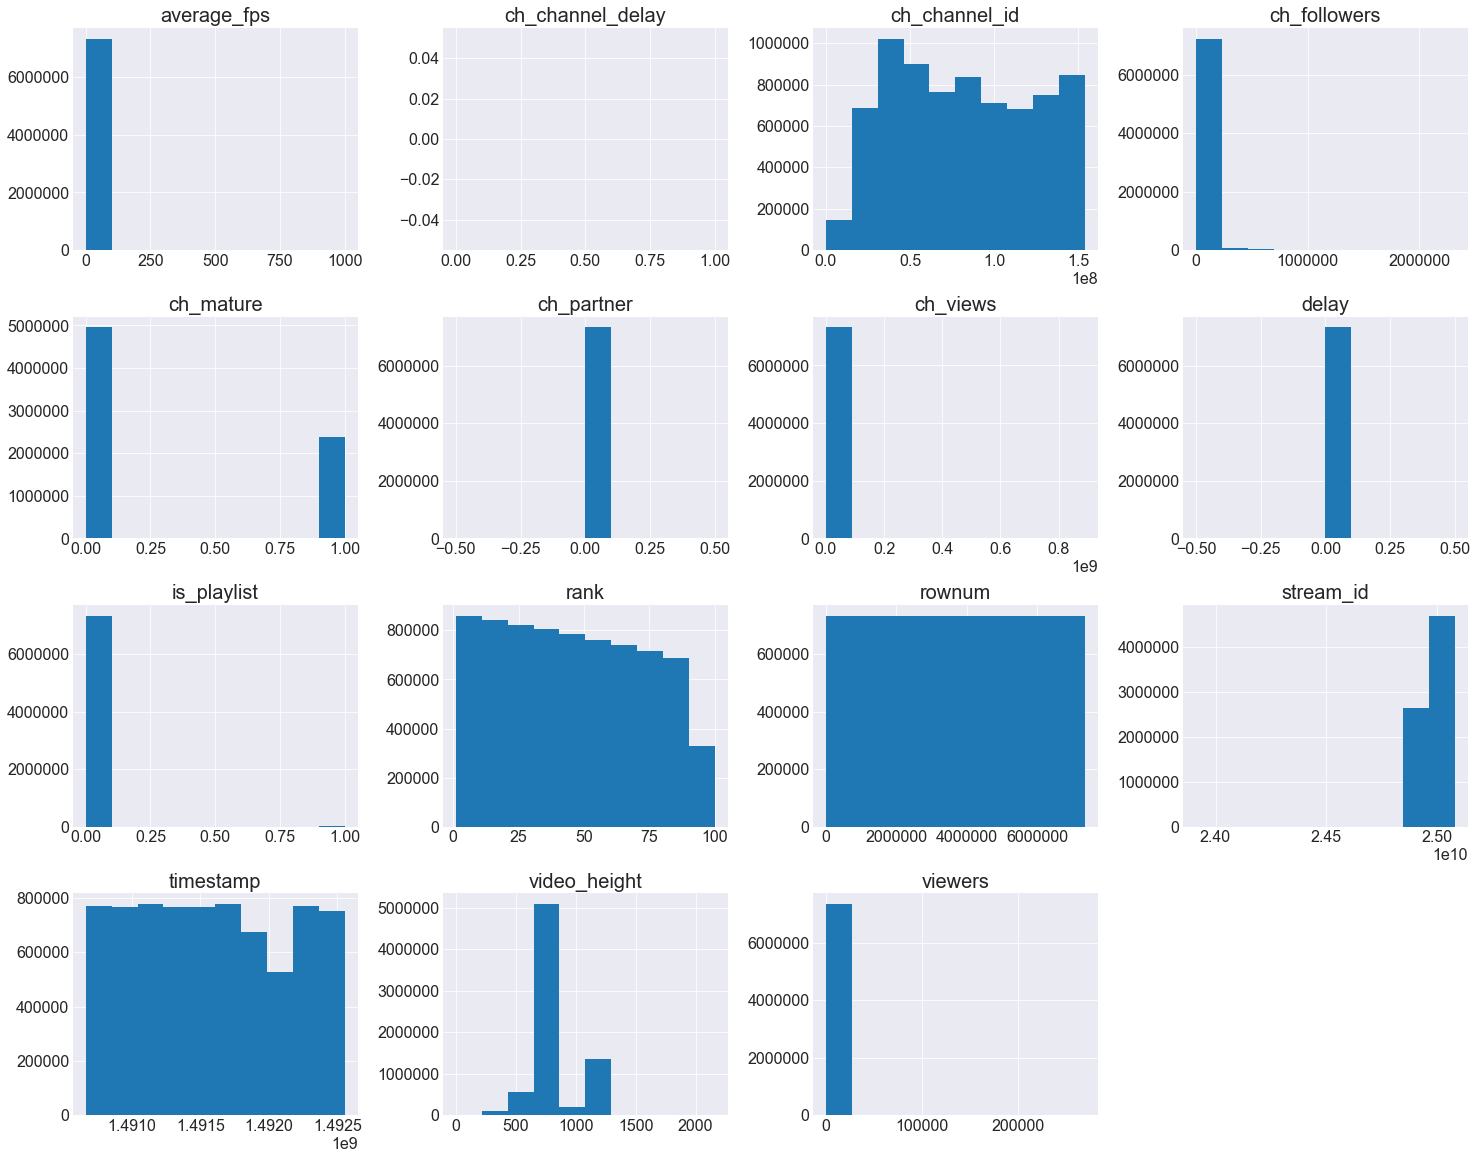

In [14]:
print 'twitch_streams'
dfBig.hist(figsize=(25,20))
plt.show()

In [15]:
print 'twitch_summary'
dfSummary.describe()

twitch_summary


rownum       viewers      channels     timestamp
count  3145.000000  3.145000e+03   3145.000000  3.145000e+03
mean   1573.000000  7.011980e+05  22036.665183  1.491608e+09
std     908.027624  2.129647e+05   6305.256598  5.451370e+05
min       1.000000  3.550010e+05  11030.000000  1.490664e+09
25%     787.000000  5.368860e+05  16366.000000  1.491137e+09
50%    1573.000000  6.501400e+05  23011.000000  1.491608e+09
75%    2359.000000  8.704230e+05  26932.000000  1.492080e+09
max    3145.000000  1.438818e+06  37135.000000  1.492553e+09

twitch_summary


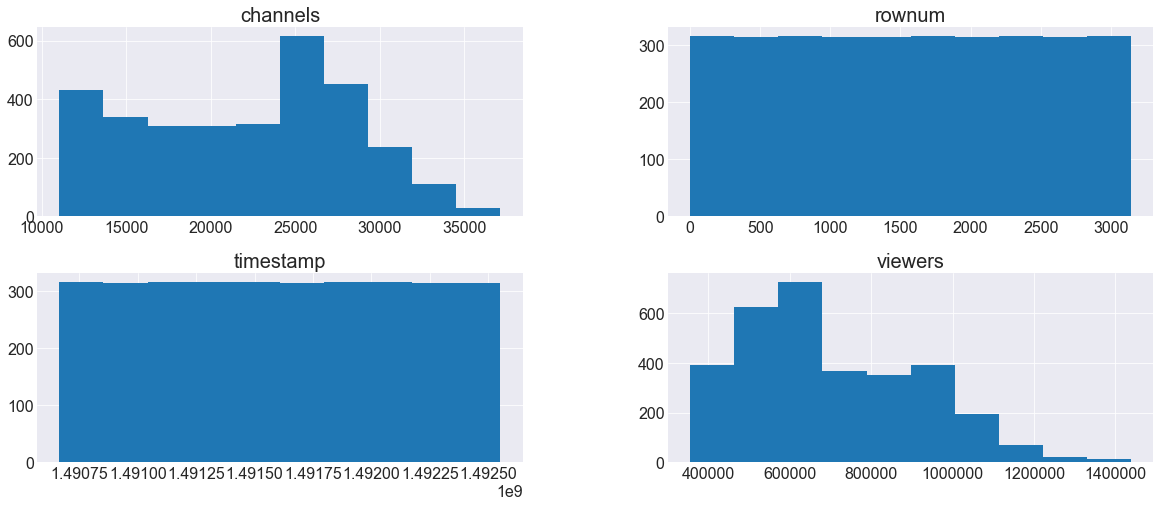

In [16]:
print 'twitch_summary'

dfSummary.hist(figsize=(20,8))
plt.show()


## 4. Executive Summary 

We chose to analyze data from the streaming website Twitch.tv. The data on hand was viewership data for different channels and gaming live-streams, collected every 10 minutes.

We looked at how viewership varies during the time for which the data was collected. We saw that the viewer numbers for a particular game were affected by a few 'key' external factors outside of just general popularity of the game. We will list those and show supporting data for them below.

- Impact of e-sports events (tournaments) on game viewership
- The impact of big streamers' followers on game viewership
- The impact of time/geography on game viewership

### 1. Impact of e-sports events (tournaments) on game viewership

Below is a plot of viewers over time for the game Street Fighter V. If you look at the general pattern for Street Fighter V viewers, the number usually hovers somewhere around ~2,500 at any given point in time. However, we noticed that there were sometimes massive spikes that went up to 30,000-40,000 viewers (more than 10x increase!). Upon investigation we found that these spikes were related to tournaments and competitive events. In the below chart, you can see an example of this through the massive effect of The ELEAGUE Street Fighter V Invitational (link below) on street fighter viewership during this time period. We saw a similar effect of large tournaments in other games as well.


Tournament link: http://www.eleague.com/street-fighter-v/bracket#QG67Nc4Jhiqx

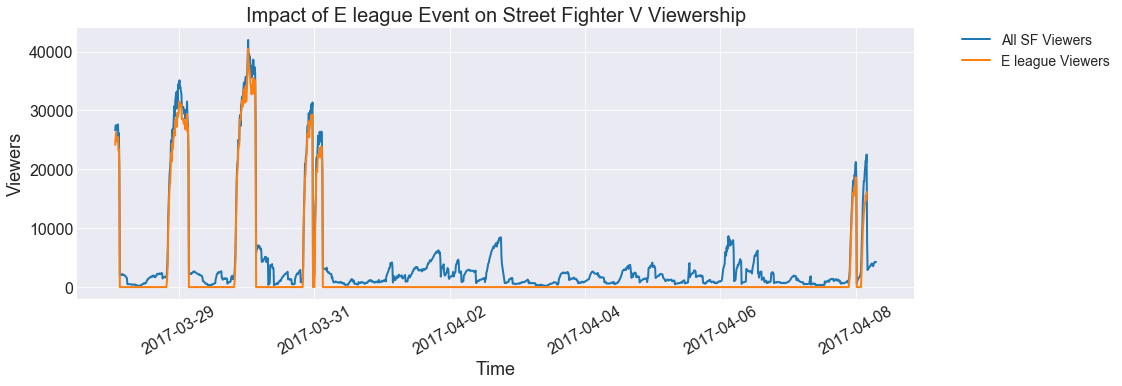

In [17]:
#Impact of tournaments on Street Fighter Viewership, ELeague example
sfDF = dfBig.loc[dfBig['stream_game']=="Street Fighter V"]
#sfDF = sfDF.loc[sfDF['timestamp']< 1491436800]
topSF = sfDF.loc[sfDF["rank"]==1]

eLeagueSF = sfDF.loc[sfDF["ch_channel_name"]=="eleaguetv"]
eLeagueSF = eLeagueSF.set_index("time")
eLeagueSF = eLeagueSF.resample("10 min")
eLeagueSF= eLeagueSF.mean()
eLeagueSF['viewers'] = eLeagueSF['viewers'].fillna(0)


thisDF = df.loc[df['name'] == "Street Fighter V"]
#thisDF = thisDF.loc[thisDF['timestamp']< 1491436800]
anotherDF =thisDF.iloc[:1600]


plt.figure(figsize = (15,5))

plt.plot(anotherDF['time'],anotherDF['viewers'].values, label = "All SF Viewers")
#plt.plot(topSF['time'],topSF['viewers'].values, label = "Top SF Streamer Viewers")
plt.plot(list(eLeagueSF.index),list(eLeagueSF['viewers'].values), label = "E league Viewers")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Impact of E league Event on Street Fighter V Viewership")
labels = plt.gca().get_xticklabels()
plt.setp(labels, rotation=30)
#plt.gca().invert_yaxis()
plt.xlabel("Time")
plt.ylabel("Viewers")
plt.show()

### 2. The impact of big streamers' followers on game viewership

Below we have a chart that shows us the following two things:
1. During this time period, there was an upward trend in the average number of people watching a Grand Theft Auto V (GTA V) stream at any given point in time. Notice that similar to the Street Fighter V data before, there are sudden large spikes in viewership.
2. We then draw dotted vertical lines for when the three popular streamers 'summit1g', 'lirik' and 'giantwaffle' reach a local peak in their viewership over time (i.e. they start streaming and pick up viewers), and we can see that the spikes in viewership correspond almost exactly to the time that these streamers begin broadcasting.

These three streamers possess some of the largest individual (non-organization) channels on twitch and have massive follower bases. They generally stream other games besides GTA V, but the below chart shows that their fan base will follow them from game to game, implying that they are more interested in watching the streamer personality than the particular game that they might be playing. 

As such, if a game was to invite a large streamer to come and beta test or play a particular game, that could be a very good advertising strategy to give the game some exposure.

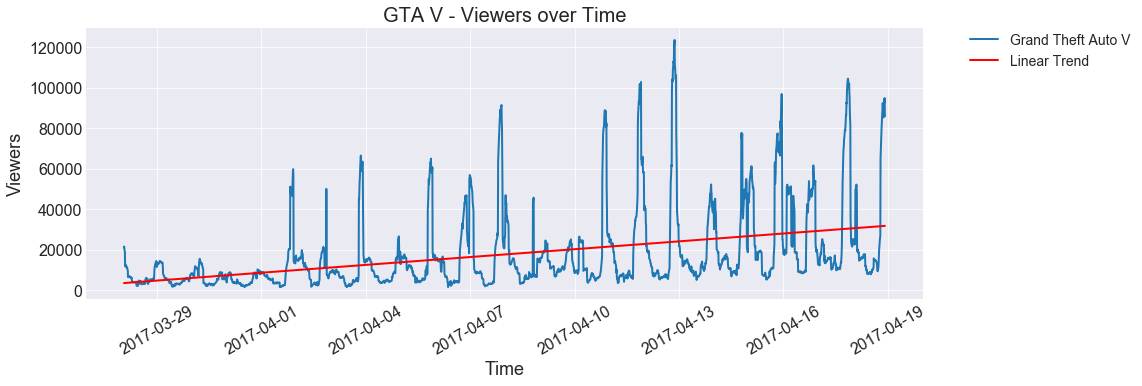

In [18]:
#which games rise over time - GTA V

plt.figure(figsize = (15,5))
thisDF = df.loc[df['name'] == "Grand Theft Auto V"]
#thisDF = thisDF.loc[thisDF['timestamp']< 1491436800]
anotherDF =thisDF

x=np.arange(len(anotherDF['viewers'].values))
fit = np.polyfit(x ,anotherDF['viewers'].values, deg = 1)

plt.plot(anotherDF['time'],anotherDF['viewers'].values, label = "Grand Theft Auto V")
plt.plot(anotherDF['time'], fit[0]*x +fit[1], color = 'red', label='Linear Trend')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("GTA V - Viewers over Time")
labels = plt.gca().get_xticklabels()
plt.setp(labels, rotation=30)
plt.xlabel("Time")
plt.ylabel("Viewers")
plt.show()

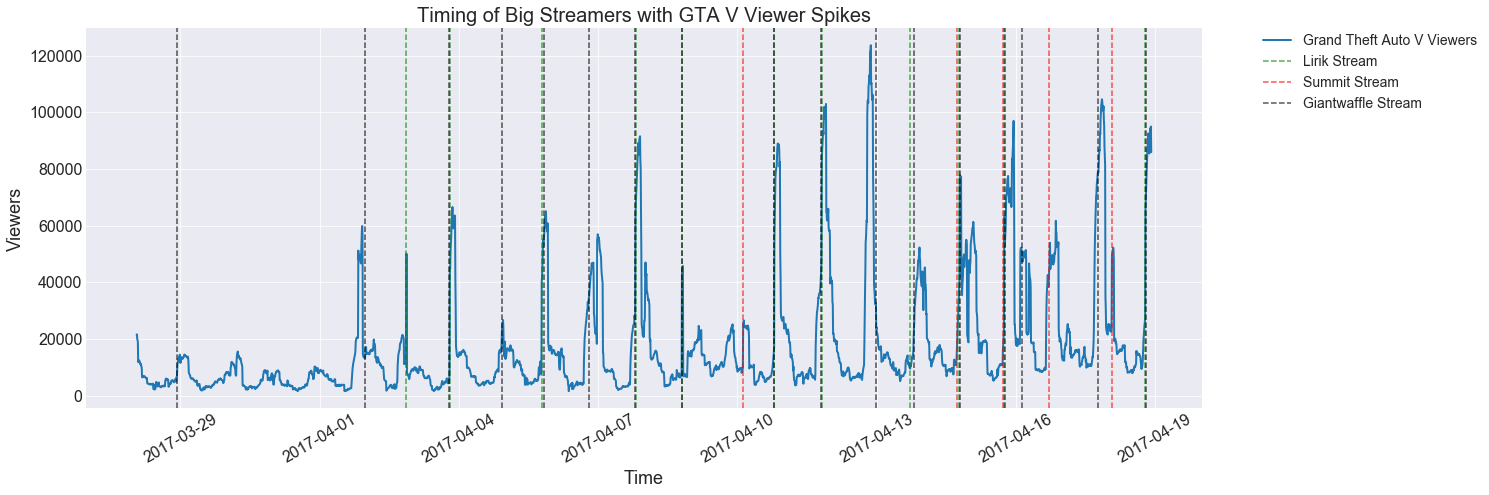

In [19]:
plt.figure(figsize = (20,7))
thisDF = df.loc[df['name'] == "Grand Theft Auto V"]
#thisDF = thisDF.loc[thisDF['timestamp']< 1491436800]
anotherDF =thisDF

summitDF = dfBig.loc[dfBig["ch_channel_name"]=="summit1g"]
summitDF = summitDF.loc[summitDF["stream_game"]== "Grand Theft Auto V"]

lirikDF = dfBig.loc[dfBig["ch_channel_name"]=="lirik"]
lirikDF = lirikDF.loc[lirikDF["stream_game"]== "Grand Theft Auto V"]

giantwaffleDF=dfBig.loc[dfBig["ch_channel_name"]=="giantwaffle"]
giantwaffleDF = giantwaffleDF.loc[giantwaffleDF["stream_game"]== "Grand Theft Auto V"]


plt.plot(anotherDF['time'],anotherDF['viewers'].values, label = "Grand Theft Auto V Viewers")
#plt.plot(summitDF['time'],anotherDF['viewers'].values, label = "Summit Playing GTA")
#plt.plot(lirikDF['time'],lirikDF['viewers'].values, label = "Lirik Playing GTA")

prev = None
for t in lirikDF['time']:
    if prev != None:
        if (t-prev) > pd.tslib.Timedelta(minutes=240):
            plt.axvline(t, color='green', linestyle='--', alpha=0.5, label = "Lirik Stream" )
    prev = t
prev = None
for t in summitDF['time']:
    if prev != None:
        if (t-prev) > pd.tslib.Timedelta(minutes=240):
            plt.axvline(t, color='red', linestyle='--', alpha=0.5, label = "Summit Stream" )
    prev = t
prev = None
for t in giantwaffleDF['time']:
    if prev != None:
        if (t-prev) > pd.tslib.Timedelta(minutes=240):
            plt.axvline(t, color='black', linestyle='--', alpha=0.5, label = "Giantwaffle Stream" )
    prev = t
    
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
labels = plt.gca().get_xticklabels()
plt.setp(labels, rotation=30)
plt.title("Timing of Big Streamers with GTA V Viewer Spikes")
plt.xlabel("Time")
plt.ylabel("Viewers")
plt.show()

### 3. The impact of time/geography on game viewership

We also analyzed the impact of time of day on viewership for a particular game.
In the below heatmap, we look at average viewership numbers during each hour of the week.
(Our data is in the UTC timezone) Notice that the brighter (higher) values are concentrated around hours 15-23. This roughly corresponds to afternoon-night in the USA and the evening-late night in Europe. If you assume that a lot of gaming occurs in the evening when people get back home from school or work, this could imply that viewership is concentrated in the USA and Europe, however it is hard to pin-point exactly what is going on from just the heat map.

In [20]:
#are there games that peak at different time periods?
heatMapGameList = ["PLAYERUNKNOWN'S BATTLEGROUNDS"]

thisDF = df.loc[df['name'].isin(heatMapGameList)]
#aggregate data by hour of day/day of week
thisDF["Hour"] = thisDF["time"].dt.hour
thisDF["DOW"] = thisDF["time"].dt.dayofweek

f = {'viewers':['mean'], 'name':sole_value, 'DOW': sole_value, 'Hour': sole_value}

thisSubGroup= thisDF.groupby(['DOW', 'Hour','name']).agg(f)
thisDF = pd.DataFrame(thisSubGroup)
thisDF.columns = ["hour", "name", "viewersMean", "dow"]
neededdf = thisDF

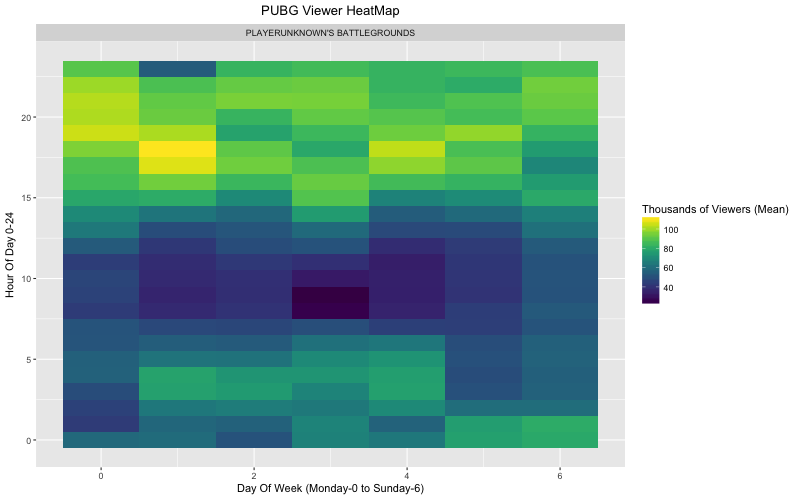

In [21]:
%%R -i neededdf -w 800 -h 500

library(ggplot2)
library(viridis)
neededdf <- as.data.frame(neededdf)


#divide by max scaler
#neededdf$viewers= neededdf$viewers/max(neededdf$viewers)
ggplot(data = neededdf, aes(x = dow, y = hour)) +
  geom_tile(aes(fill = viewersMean/1000)) + 
  scale_fill_viridis(name = "Thousands of Viewers (Mean)") +
 labs(title="PUBG Viewer HeatMap", x= "Day Of Week (Monday-0 to Sunday-6)", y = "Hour Of Day 0-24") +
  theme(plot.title = element_text(hjust = 0.5))+ 
 facet_wrap(~name)

Below, we have an **interactive** (you can hover your mouse over the time-series line chart) visualization that tells a better story.

We look at the game FIFA 2017, a soccer game, and observe that the peaks occur in the early evening-night in Europe, where soccer is extremely popular. From this and our evening gaming assumption, we can infer that the viewership for FIFA is mostly concentrated in Europe. 

(Direct link to visualization: https://cyruslala.github.io/EDAV_Columbia2017_Twitch/d3/fifaindex.html)

In [22]:
from IPython.display import IFrame

from IPython.display import HTML

HTML('''<style>
    #frame { width: 1000px; height:800px; border: 1px solid black; }
    #frame {
        -ms-zoom: 0.95;
        -moz-transform: scale(0.95);
        -moz-transform-origin: 0 0;
        -o-transform: scale(0.95);
        -o-transform-origin: 0 0;
        -webkit-transform: scale(0.95);
        -webkit-transform-origin: 0 0;
    }
</style>

<div id="wrap">
<iframe id="frame" src="http://cyruslala.github.io/EDAV_Columbia2017_Twitch/d3/fifaindex.html"></iframe>
</div>

''')

An even more interesting story can be seen in the data for *'Dota 2'*, a very popular MOBA(Multiplayer Online Battle Arena) game that is played accross the world.

The two things of interest to note here are:

1. Around the start of April, we see large spikes in viewership, during the daytime in China. This is due to the Dota Asia Championships 2017 that were held in China during those dates. People around the world were tuning in as the tournament took place in China. You can read more about the tournament <a href="http://www.dota2.com.cn/dac/english/match?date=04-01">here.</a>

2. Apart from some outliers, we noticed that there are multiple peaks in viewership per-day for Dota. These seem to occur during night time in US and Europe. This can be observed as a plateau of peak viewership as night progresses in Europe and Asia, since players and streamers come in and out at their respective evening and night times.

In [23]:
from IPython.display import IFrame

from IPython.display import HTML

HTML('''<style>
    #frame { width: 1000px; height:800px; border: 1px solid black; }
    #frame {
        -ms-zoom: 0.95;
        -moz-transform: scale(0.95);
        -moz-transform-origin: 0 0;
        -o-transform: scale(0.95);
        -o-transform-origin: 0 0;
        -webkit-transform: scale(0.95);
        -webkit-transform-origin: 0 0;
    }
</style>

<div id="wrap">
<iframe id="frame" src="http://cyruslala.github.io/EDAV_Columbia2017_Twitch/d3/fifaindex.html"></iframe>
</div>

''')

HTML('''<style>
    #frame { width: 1000px; height:800px; border: 1px solid black; }
    #frame {
        -ms-zoom: 0.95;
        -moz-transform: scale(0.95);
        -moz-transform-origin: 0 0;
        -o-transform: scale(0.95);
        -o-transform-origin: 0 0;
        -webkit-transform: scale(0.95);
        -webkit-transform-origin: 0 0;
    }
</style>

<div id="wrap">
<iframe id="frame" src="http://cyruslala.github.io/EDAV_Columbia2017_Twitch/d3/dotaindex.html"></iframe>
</div>

''')

## 5. Main Analysis

### Fetching and Cleaning Data

* Data Fetch/Cleanup code is located here: 
    - https://github.com/shashankrao/TwitchDataAnalysis/blob/master/notebooks-code/Giantbomb_Pull.ipynb
    - https://github.com/shashankrao/TwitchDataAnalysis/blob/master/notebooks-code/Giantbomb_Cleanup.ipynb
    - https://github.com/shashankrao/TwitchDataAnalysis/blob/master/notebooks-code/TwitchScraper.py

### Initial Analysis (Data Exploration)

Lets start by looking at ‘big’ streams that had 5000+ viewers at some point. This gives us some idea about viewer numbers on Twitch. 

Note: Most of the twitch data is "top-heavy" in viewers and "bottom-heavy" in channels/streams, meaning that the vast majority of the viewership happens in the top few channels, and the vast majority of channels have very few concurrent viewers, so for many of our charts we consider high ranking or top games and streams to avoid a lot of data centered at 0. This pattern is evident even in the plots below that are filtered for 'big' streams and channels.

In [24]:
dfr1 = dfBig[dfBig["viewers"] > 5000][["viewers"]]

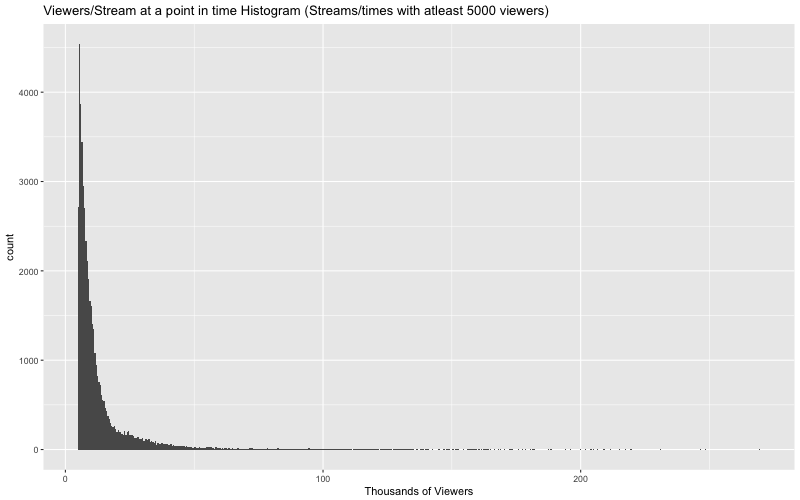

In [25]:
%%R -i dfr1 -w 800 -h 500
library(plyr)
library(ggplot2)

#Most are centered around 0, so we can look at only 'big' streams that had 1000+ viewers at some point
ggplot(dfr1, aes(x = viewers/1000)) + 
  geom_histogram(binwidth = .5) +
    xlab("Thousands of Viewers") +
  ggtitle("Viewers/Stream at a point in time Histogram (Streams/times with atleast 5000 viewers)")

We could also lookup a streams ‘rank’. We define rank of a stream as its position within a game’s top streams. Eg: Rank 1 for Dota 2 means at a particular timestamp, that stream was the most watched stream for Dota 2. Below, we look at viewers of streams that had a rank of 7 or above.

In [26]:
dfr2 = dfBig[dfBig["rank"] < 8][["viewers"]]

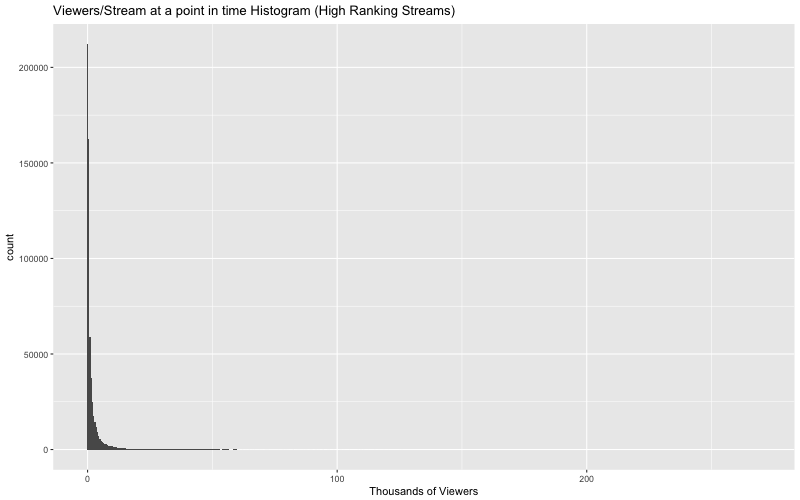

In [27]:
%%R -i dfr2 -w 800 -h 500

ggplot(dfr2, aes(x = viewers/1000)) + 
    xlab("Thousands of Viewers") +
  geom_histogram(binwidth = .5) +
  ggtitle("Viewers/Stream at a point in time Histogram (High Ranking Streams)")

We now consider high ranking channels and observe the histogram of how many followers a channel has.

In [28]:
dfr3 = dfBig[dfBig["rank"] < 10][["ch_followers", "ch_channel_name"]]

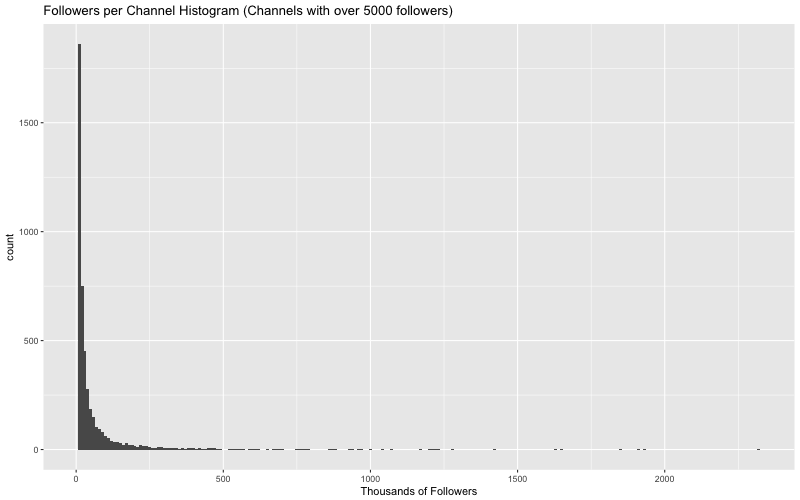

In [29]:
%%R -i dfr3 -w 800 -h 500

#look at a follower histogram
#Select Max followers per channel (i.e. latest data)
maxFollowers = ddply(dfr3 , .(ch_channel_name), summarize, latestfollowers = max(ch_followers))
ggplot(maxFollowers[which(maxFollowers$latestfollowers>5000),], aes(x = latestfollowers/1000)) + 
    xlab("Thousands of Followers") +
  geom_histogram(binwidth = 10) +
  ggtitle("Followers per Channel Histogram (Channels with over 5000 followers)")  + guides(fill = FALSE)

Our data is in time-series form and the vast majority of the analysis is done over time. Before we get into that, we performed some aggregation to answer some basic questions such as which games/channels/genres are the most popular.

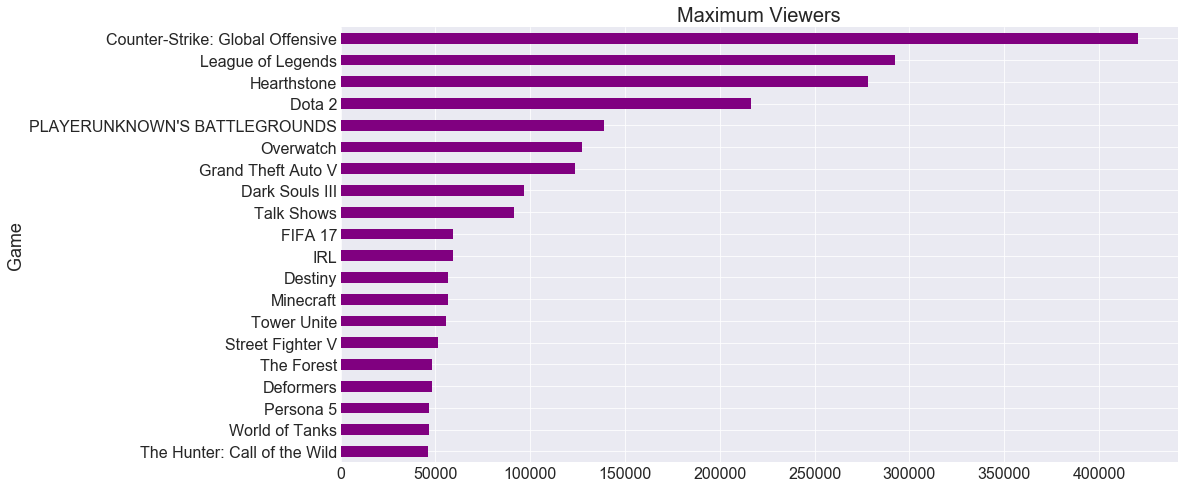

In [30]:
#what are the most popular games (Aggregated)
thisDF = df
#aggregate data by hour of day/day of week
thisDF["Hour"] = thisDF["time"].dt.hour
thisDF["DOW"] = thisDF["time"].dt.dayofweek

#note: using max viewers during this time period
f = {'viewers':['max'], 'name':sole_value}
thisSubGroup= thisDF.groupby(['name']).agg(f)
thisDF = pd.DataFrame(thisSubGroup)

thisDF.columns = ['game', 'viewers']
thisDF = thisDF.sort(['viewers'], ascending=0)

ax = thisDF["viewers"][0:20].plot(kind='barh', subplots=True, figsize=(15,8), color="purple")
plt.gca().invert_yaxis()
plt.title("Maximum Viewers")
plt.ylabel("Game")
plt.show()


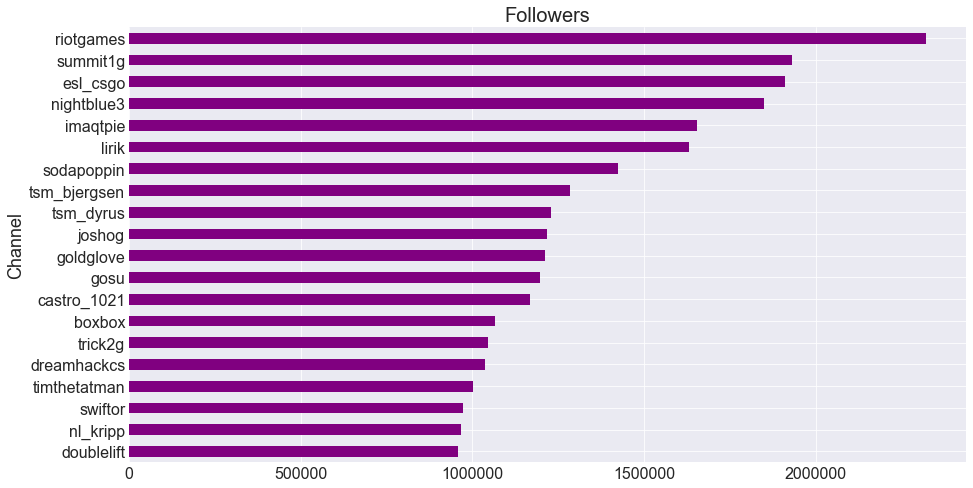

In [31]:
#what are the most popular channels? - followers
thisDF = dfBig
#aggregate data by hour of day/day of week
thisDF["Hour"] = thisDF["time"].dt.hour
thisDF["DOW"] = thisDF["time"].dt.dayofweek

f = {'ch_followers':['max'], 'ch_views':['max'], 'ch_channel_name':sole_value}
thisSubGroup= thisDF.groupby(['ch_channel_name']).agg(f)
thisDF = pd.DataFrame(thisSubGroup)


thisDF.columns = ['name', 'followers', 'views']

thisDF = thisDF.sort(['followers'], ascending=0)

ax = thisDF["followers"][0:20].plot(kind='barh', subplots=True, figsize=(15,8), color="purple")
plt.gca().invert_yaxis()
plt.title("Followers")
plt.ylabel("Channel")
plt.show()


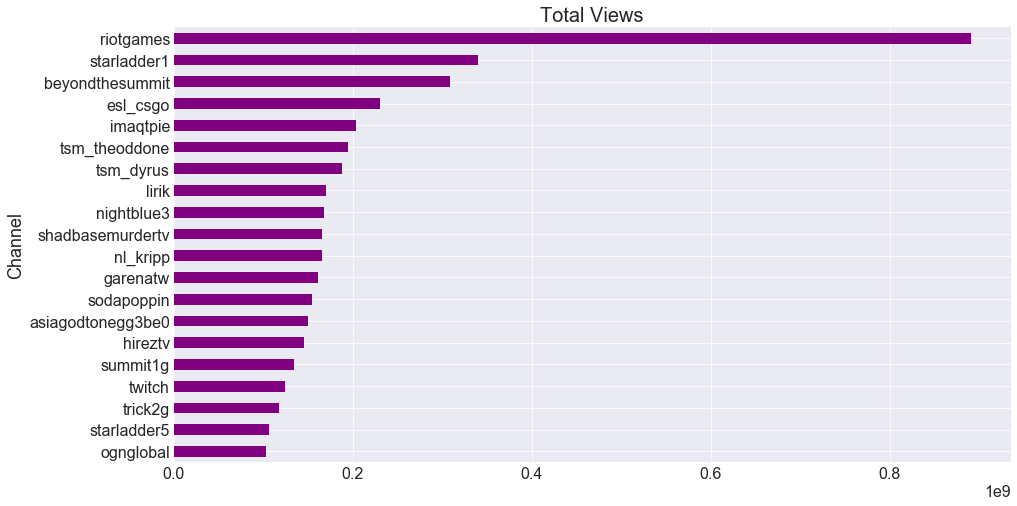

In [32]:
#what are the most popular channels? - views
thisDF =thisDF.sort(['views'], ascending=0)

ax = thisDF["views"][0:20].plot(kind='barh', subplots=True, figsize=(15,8), color="purple")
plt.gca().invert_yaxis()
plt.title("Total Views")
plt.ylabel("Channel")
plt.show()


Below we analyzed the average viewers per genre of the game (at any snapshot in time).

In [33]:
dfNewGenre = giantbombdf

In [34]:
genreList = dfNewGenre.groupby(by='genre')['viewers'].max()
genreList =genreList[(genreList > 40000)]
genreList=list(genreList.index)
genreList.remove('unknown')
random.shuffle(genreList)
#print genreList

In [35]:
yaxisvals = []
for i in range(0,len(genreList)):
    #thisDF = dfWithGenre.loc[dfWithGenre['gbGenre'] == genreList[i]]
    secondary = dfNewGenre.loc[dfNewGenre['genre'] == genreList[i]]
    f = {'viewers':['sum'], 'time':sole_value}
    anothersecDF = secondary.groupby(by=["genre", "timestamp"])["time", "viewers"].agg(f)
    finalDF = pd.DataFrame(anothersecDF)
    vals = finalDF['viewers'].values
    totalvals = vals.sum()
    meanvals = totalvals/ (1.0*len(finalDF['time']))
    yaxisvals.append(meanvals)

In [36]:
genreBarDF = pd.DataFrame(columns= ['genre','Average Viewers'])
genreBarDF['genre'] = genreList
genreBarDF['Average Viewers'] = yaxisvals
genreBarDF.index = genreBarDF['genre']

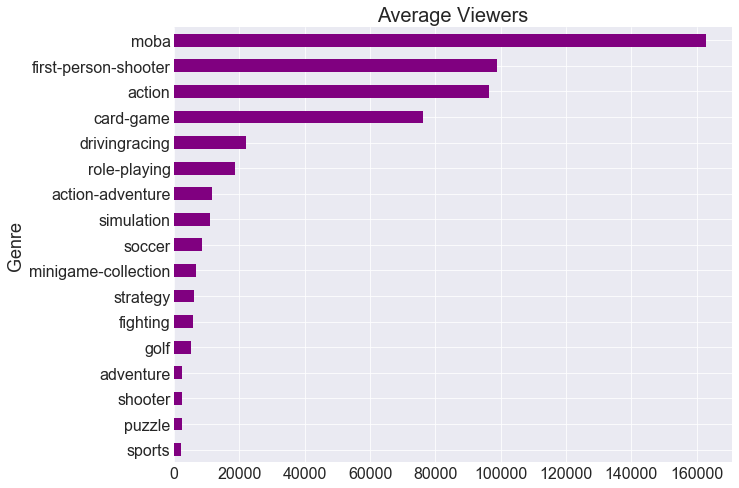

In [37]:
genreBarDF =genreBarDF.sort(['Average Viewers'], ascending=0)

ax = genreBarDF["Average Viewers"][0:20].plot(kind='barh', subplots=True, figsize=(10,8), color="purple")
plt.gca().invert_yaxis()
plt.title("Average Viewers")
plt.ylabel("Genre")
plt.show()

Next we plot overall twitch viewership (every 10 minutes) over the time period in our data. We observe a cyclical pattern in viewership over time, and we also observe the presence of multiple peaks in some of the cycles. We will analyze and discuss this later on.

In [38]:
dfr4 = dfSummary

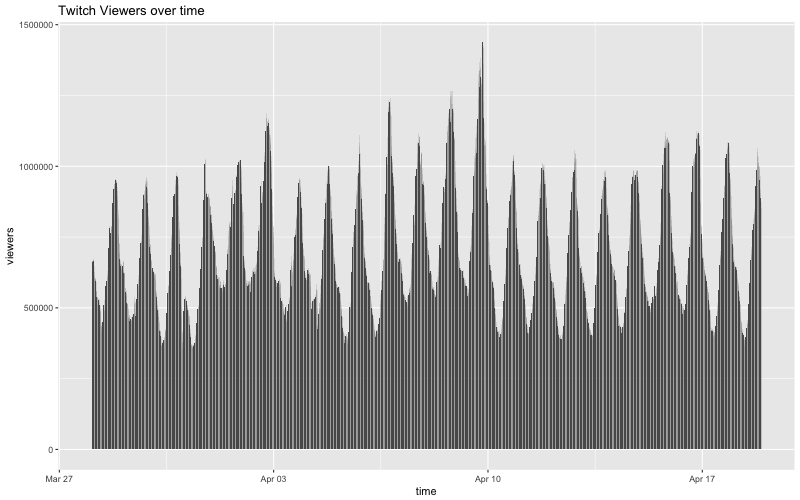

In [39]:
%%R -i dfr4 -w 800 -h 500
ggplot(dfr4, aes(x=time, y =viewers)) + 
  geom_bar(stat='identity') + ggtitle("Twitch Viewers over time")

We now slice our data by game, and look at viewership over a 48 hour period for games that have crossed the threshold of 50k viewers at some point in our data. 

We observe that the top 5-6 games are fairly consistently much higher than any of the other games.

We then look at the same plot with rank instead of viewers. Once again, we observe that the top 5-6 games form a band at the top while the others vary greatly. The third plot shows just the top 5 games.

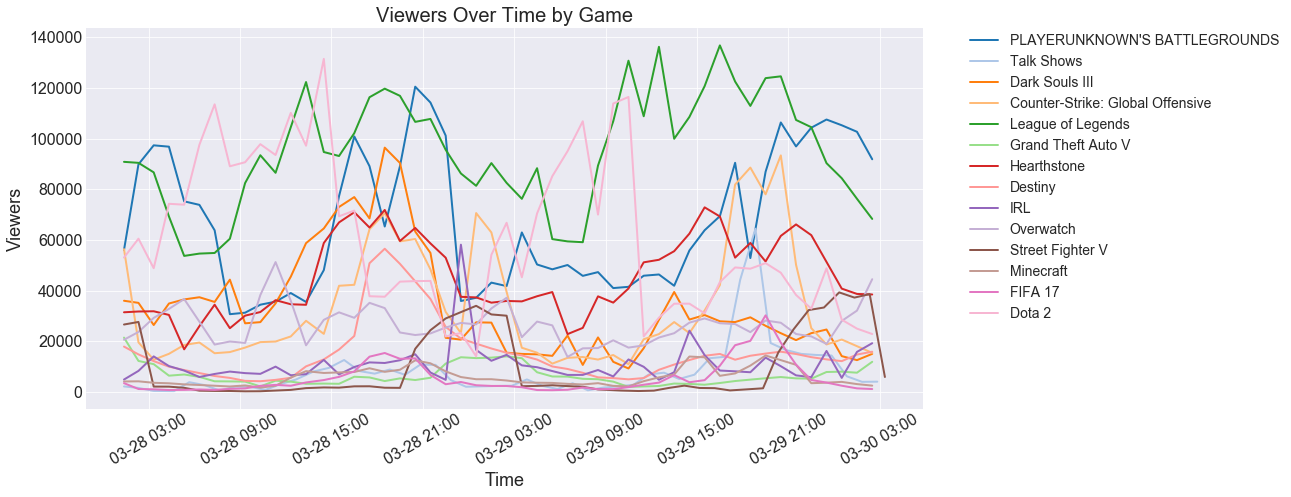

In [40]:
#Question 1 - Game Popularity - Viewers

gameList = df.groupby(by='name')['viewers'].max()
gameList =gameList[(gameList > 50000)]
gameList=list(gameList.index)

#print len(gameList)
#print gameList
gameList.remove('Tower Unite')
thisDF = df.loc[df['name'].isin(gameList)]
random.shuffle(gameList)
#print gameList


plt.figure(figsize = (15,7))

for i in range(0, len(gameList)):
    thisDF = df.loc[df['name'] == gameList[i]]
    anotherDF =thisDF.iloc[::6,:].iloc[:50]
    plt.plot(anotherDF['time'],anotherDF['viewers'].values, label = gameList[i], color= plt.get_cmap('Vega20')(i))
myFmt = mdates.DateFormatter('%m-%d %H:00')
plt.gca().xaxis.set_major_formatter(myFmt)
labels = plt.gca().get_xticklabels()
plt.setp(labels, rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Viewers Over Time by Game")
plt.xlabel("Time")
plt.ylabel("Viewers")
plt.show()

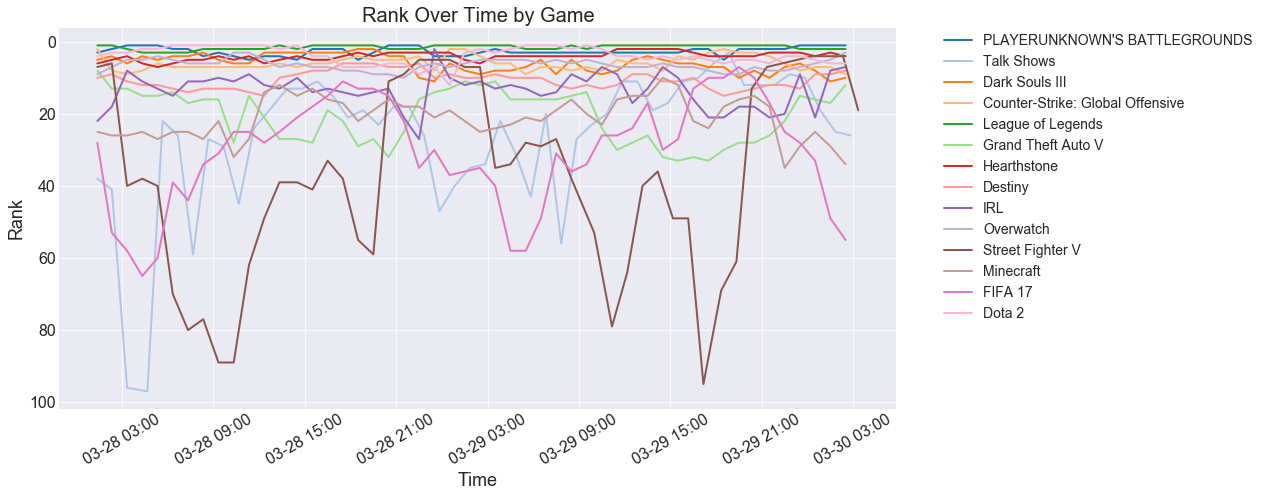

In [41]:
#Question 1 - Game Popularity - Rank
plt.figure(figsize = (15,7))

for i in range(0, len(gameList)):
    thisDF = df.loc[df['name'] == gameList[i]]
    anotherDF =thisDF.iloc[::6,:].iloc[:50]
    plt.plot(anotherDF['time'],anotherDF['rank'].values, label = gameList[i], color= plt.get_cmap('Vega20')(i))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
myFmt = mdates.DateFormatter('%m-%d %H:00')
plt.gca().xaxis.set_major_formatter(myFmt)
labels = plt.gca().get_xticklabels()
plt.setp(labels, rotation=30)
plt.title("Rank Over Time by Game")
plt.gca().invert_yaxis()
plt.xlabel("Time")
plt.ylabel("Rank")
plt.show()

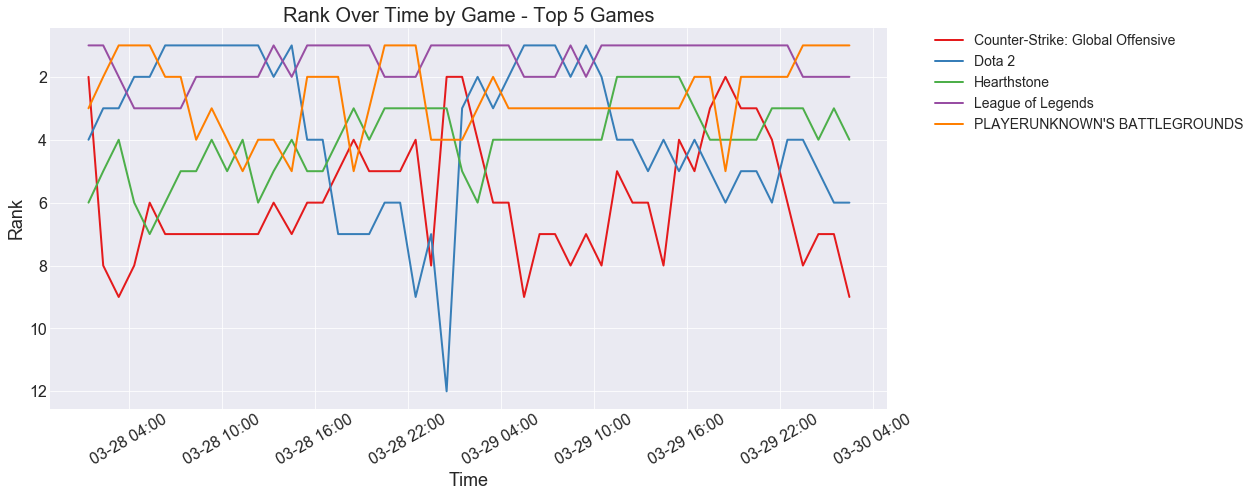

In [42]:
topGameList = df.groupby(by='name')['viewers'].max()

topGameList =topGameList[(topGameList > 130000)]
topGameList=list(topGameList.index)


#Question 1 - Game Popularity - Rank
plt.figure(figsize = (15,7))

for i in range(0, len(topGameList)):
    thisDF = df.loc[df['name'] == topGameList[i]]
    anotherDF =thisDF.iloc[::6,:].iloc[:50]
    plt.plot(anotherDF['time'],anotherDF['rank'].values, label = topGameList[i], color= plt.get_cmap('Set1')(i))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
myFmt = mdates.DateFormatter('%m-%d %H:00')
plt.gca().xaxis.set_major_formatter(myFmt)
labels = plt.gca().get_xticklabels()
plt.setp(labels, rotation=30)
plt.title("Rank Over Time by Game - Top 5 Games")
plt.gca().invert_yaxis()
plt.xlabel("Time")
plt.ylabel("Rank")
plt.show()

### Analyzing the wide variations in rank for 'Street Fighter V'

<img src="report-assets/SF5.png" width="300px;" height="200px" />

We found it interesting that there were some games that varied so widely in rank, so we decided to look at the data for 'Street Fighter V' and dig deeper.

As expected, we saw a pattern with multiple spikes that went drastically over the regular pattern (~3000 to ~35000). 
We then tried to track down the channels that were active during the spike periods and had large viewer numbers. We found that the channel 'eleaguetv' (https://www.twitch.tv/eleaguetv) was active during the first few spikes. After some research we found that this channel was an organization holding a tournament* and streaming it, and this is what was causing the spike in viewership. 
To further illustrate this effect, we plotted the viewer numbers for eleaguetv alongside the numbers for Street Fighter V in total on the same graph for the relevant time period.

This is one example of the massive effect a competitive event can have on viewership for a particular game.

*-(The ELEAGUE Street Fighter V Invitational - http://www.eleague.com/street-fighter-v/bracket#QG67Nc4Jhiqx)


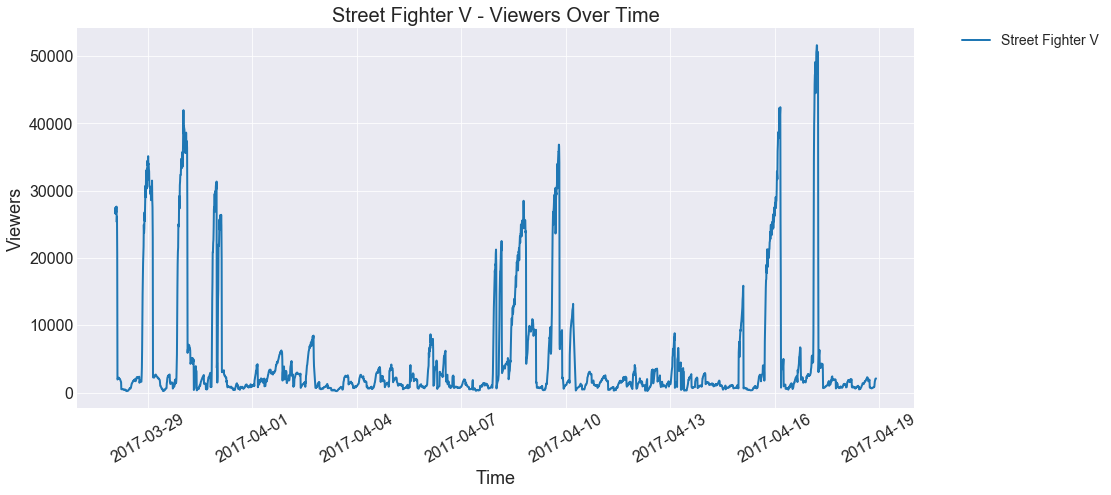

In [43]:
#Street Fighter Global Viewers - notice erratic spike pattern
thisDF = df.loc[df['name'] == "Street Fighter V"]
anotherDF =thisDF

plt.figure(figsize = (15,7))
plt.plot(anotherDF['time'],anotherDF['viewers'].values, label = "Street Fighter V")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Street Fighter V - Viewers Over Time")
labels = plt.gca().get_xticklabels()
plt.setp(labels, rotation=30)
#plt.gca().invert_yaxis()
plt.xlabel("Time")
plt.ylabel("Viewers")
plt.show()

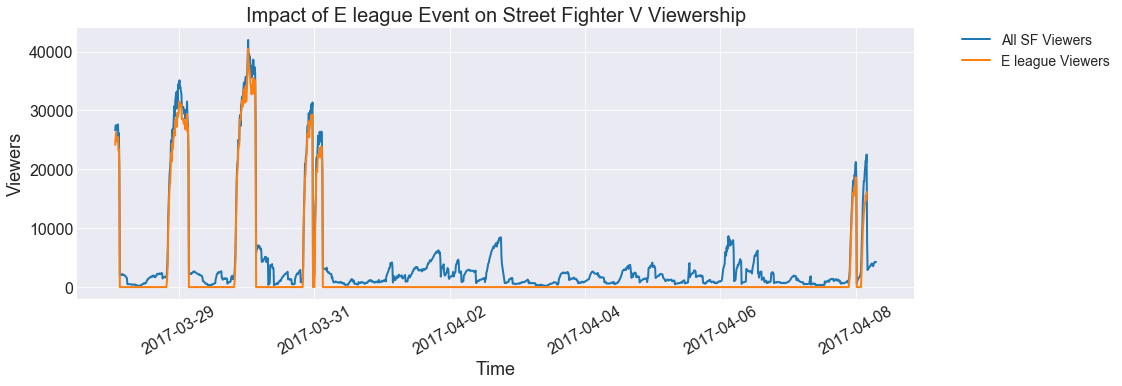

In [44]:
#Impact of tournaments on Street Fighter Viewership, ELeague example
sfDF = dfBig.loc[dfBig['stream_game']=="Street Fighter V"]
#sfDF = sfDF.loc[sfDF['timestamp']< 1491436800]
topSF = sfDF.loc[sfDF["rank"]==1]

eLeagueSF = sfDF.loc[sfDF["ch_channel_name"]=="eleaguetv"]
eLeagueSF = eLeagueSF.set_index("time")
eLeagueSF = eLeagueSF.resample("10 min")
eLeagueSF= eLeagueSF.mean()
eLeagueSF['viewers'] = eLeagueSF['viewers'].fillna(0)


thisDF = df.loc[df['name'] == "Street Fighter V"]
#thisDF = thisDF.loc[thisDF['timestamp']< 1491436800]
anotherDF =thisDF.iloc[:1600]


plt.figure(figsize = (15,5))

plt.plot(anotherDF['time'],anotherDF['viewers'].values, label = "All SF Viewers")
#plt.plot(topSF['time'],topSF['viewers'].values, label = "Top SF Streamer Viewers")
plt.plot(list(eLeagueSF.index),list(eLeagueSF['viewers'].values), label = "E league Viewers")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Impact of E league Event on Street Fighter V Viewership")
labels = plt.gca().get_xticklabels()
plt.setp(labels, rotation=30)
#plt.gca().invert_yaxis()
plt.xlabel("Time")
plt.ylabel("Viewers")
plt.show()

### Which games are tending updwards/downwards in viewership?

Next, we decided to search for examples of games that were trending upwards or downwards in viewership during the time period of our data.

An example of a downward trend was seen with the game 'The Legend of Zelda: Breath of the Wild'. This game was recently released (March 3, 2017) and was highly anticipated and recieved rave reviews and ratings. Our hypothesis is that given the single-player nature of the game and the fact that it is made for console, many people have already completed it or watched somebody play it, so interest in the game is dwindling during this time period.

An example of an upward trend was 'Grand Theft Auto V' (GTA V). The GTA series is very widely known and well established, with GTA V releasing in September of 2013. Since the game has been around for so long and there is not really a competitive scene for it we looked deeper into what was causing this increase below

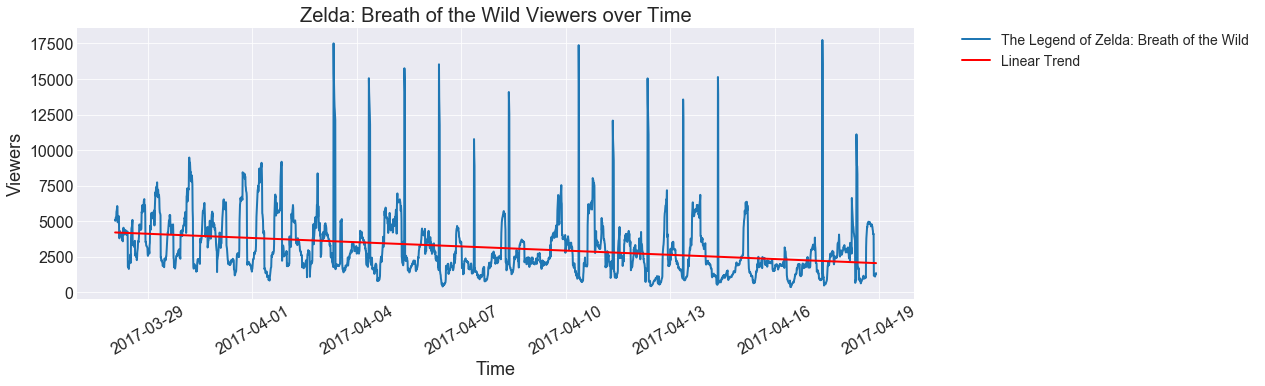

In [45]:
#New game that trails off - Zelda
plt.figure(figsize = (15,5))
thisDF = df.loc[df['name'] == "The Legend of Zelda: Breath of the Wild"]
#thisDF = thisDF.loc[thisDF['timestamp']< 1491436800]
anotherDF =thisDF

x=np.arange(len(anotherDF['viewers'].values))
fit = np.polyfit(x ,anotherDF['viewers'].values, deg = 1)

plt.plot(anotherDF['time'],anotherDF['viewers'].values, label = "The Legend of Zelda: Breath of the Wild ")
plt.plot(anotherDF['time'], fit[0]*x +fit[1], color = 'red', label='Linear Trend')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Zelda: Breath of the Wild Viewers over Time")
labels = plt.gca().get_xticklabels()
plt.setp(labels, rotation=30)
plt.xlabel("Time")
plt.ylabel("Viewers")
plt.show()

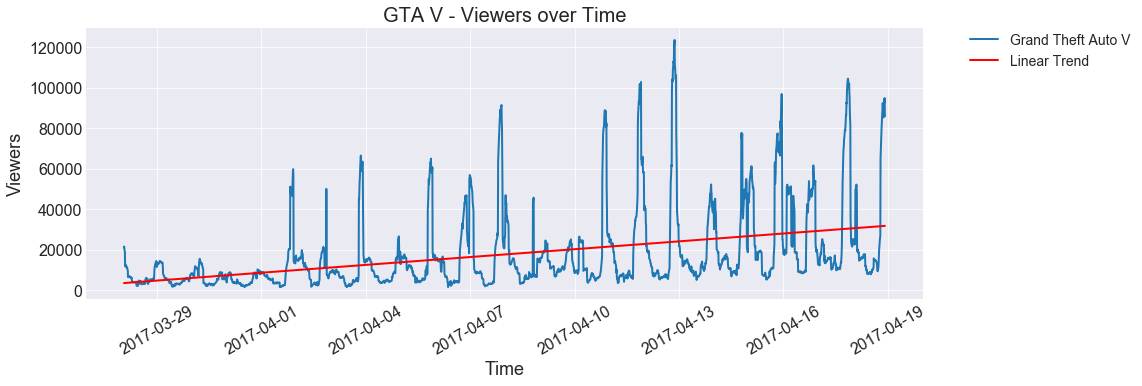

In [46]:
#which games rise over time - GTA V

plt.figure(figsize = (15,5))
thisDF = df.loc[df['name'] == "Grand Theft Auto V"]
#thisDF = thisDF.loc[thisDF['timestamp']< 1491436800]
anotherDF =thisDF

x=np.arange(len(anotherDF['viewers'].values))
fit = np.polyfit(x ,anotherDF['viewers'].values, deg = 1)

plt.plot(anotherDF['time'],anotherDF['viewers'].values, label = "Grand Theft Auto V")
plt.plot(anotherDF['time'], fit[0]*x +fit[1], color = 'red', label='Linear Trend')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("GTA V - Viewers over Time")
labels = plt.gca().get_xticklabels()
plt.setp(labels, rotation=30)
plt.xlabel("Time")
plt.ylabel("Viewers")
plt.show()

After some digging we discovered that there were some big streamers that were deviating from their usual games of choice and starting to play GTA V, and when they did so, their followers and fan base continued to watch them. In the graph below, we draw dotted vertical lines for when the streamers 'summit1g', 'lirik' and 'giantwaffle' reach a local peak in their viewership over time (i.e. they start streaming), and we can see that the spikes in viewership correspond almost exactly to the time that these streamers begin playing.

To further illustrate the point, we show GTA V's viewership with the viewers from these big streamers substracted. With the exception of the data point around April 13th (which was actually a collection of smaller but still relatively famous streamers), we see again that the spikes are almost entirely caused by the appearance of the big streamers.

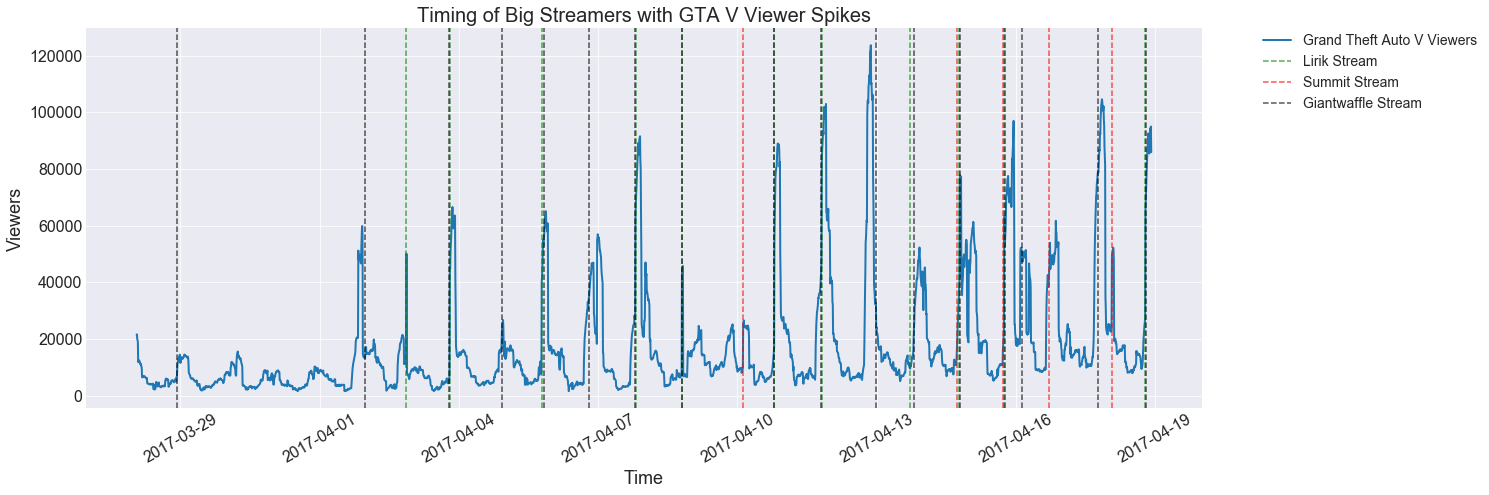

In [47]:
plt.figure(figsize = (20,7))
thisDF = df.loc[df['name'] == "Grand Theft Auto V"]
#thisDF = thisDF.loc[thisDF['timestamp']< 1491436800]
anotherDF =thisDF

summitDF = dfBig.loc[dfBig["ch_channel_name"]=="summit1g"]
summitDF = summitDF.loc[summitDF["stream_game"]== "Grand Theft Auto V"]

lirikDF = dfBig.loc[dfBig["ch_channel_name"]=="lirik"]
lirikDF = lirikDF.loc[lirikDF["stream_game"]== "Grand Theft Auto V"]

giantwaffleDF=dfBig.loc[dfBig["ch_channel_name"]=="giantwaffle"]
giantwaffleDF = giantwaffleDF.loc[giantwaffleDF["stream_game"]== "Grand Theft Auto V"]


plt.plot(anotherDF['time'],anotherDF['viewers'].values, label = "Grand Theft Auto V Viewers")
#plt.plot(summitDF['time'],anotherDF['viewers'].values, label = "Summit Playing GTA")
#plt.plot(lirikDF['time'],lirikDF['viewers'].values, label = "Lirik Playing GTA")

prev = None
for t in lirikDF['time']:
    if prev != None:
        if (t-prev) > pd.tslib.Timedelta(minutes=240):
            plt.axvline(t, color='green', linestyle='--', alpha=0.5, label = "Lirik Stream" )
    prev = t
prev = None
for t in summitDF['time']:
    if prev != None:
        if (t-prev) > pd.tslib.Timedelta(minutes=240):
            plt.axvline(t, color='red', linestyle='--', alpha=0.5, label = "Summit Stream" )
    prev = t
prev = None
for t in giantwaffleDF['time']:
    if prev != None:
        if (t-prev) > pd.tslib.Timedelta(minutes=240):
            plt.axvline(t, color='black', linestyle='--', alpha=0.5, label = "Giantwaffle Stream" )
    prev = t
    
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
labels = plt.gca().get_xticklabels()
plt.setp(labels, rotation=30)
plt.title("Timing of Big Streamers with GTA V Viewer Spikes")
plt.xlabel("Time")
plt.ylabel("Viewers")
plt.show()

In [48]:
thisDF = df.loc[df['name'] == "Grand Theft Auto V"]
#thisDF = thisDF.loc[thisDF['timestamp']< 1491436800]
anotherDF =thisDF


summitDF = dfBig.loc[dfBig["ch_channel_name"]=="summit1g"]
summitDF = summitDF.loc[summitDF["stream_game"]== "Grand Theft Auto V"]

lirikDF = dfBig.loc[dfBig["ch_channel_name"]=="lirik"]
lirikDF = lirikDF.loc[lirikDF["stream_game"]== "Grand Theft Auto V"]

giantwaffleDF=dfBig.loc[dfBig["ch_channel_name"]=="giantwaffle"]
giantwaffleDF = giantwaffleDF.loc[giantwaffleDF["stream_game"]== "Grand Theft Auto V"]

aiekilluDF=dfBig.loc[dfBig["ch_channel_name"]=="aiekillu"]
aiekilluDF = aiekilluDF.loc[aiekilluDF["stream_game"]== "Grand Theft Auto V"]


mainVals =[]
summitVals =[]
lirikVals = []
giantwaffleVals = []
aiekilluVals = []

anotherDFTimeStamps = anotherDF["timestamp"].values
for i in range(0,len(anotherDFTimeStamps)):
    thismainVal =  anotherDF.loc[anotherDF["timestamp"]== anotherDFTimeStamps[i]]["viewers"].values[0]
    thissummitVal =  summitDF.loc[summitDF["timestamp"]== anotherDFTimeStamps[i]]["viewers"].values
    thislirikVal = lirikDF.loc[lirikDF["timestamp"]== anotherDFTimeStamps[i]]["viewers"].values
    thisgiantwaffleVal = giantwaffleDF.loc[giantwaffleDF["timestamp"]== anotherDFTimeStamps[i]]["viewers"].values
    thisaiekilluVal = aiekilluDF.loc[aiekilluDF["timestamp"]== anotherDFTimeStamps[i]]["viewers"].values
    if(len(thissummitVal)==0):
        thissummitVal =0
    else:
        thissummitVal=thissummitVal[0]
    if(len(thislirikVal)==0):
        thislirikVal =0
    else:
        thislirikVal=thislirikVal[0]
    if(len(thisgiantwaffleVal)==0):
        thisgiantwaffleVal =0
    else:
        thisgiantwaffleVal=thisgiantwaffleVal[0]
    if(len(thisaiekilluVal)==0):
        thisaiekilluVal =0
    else:
        thisaiekilluVal=thisaiekilluVal[0]

        
    mainVals.append(thismainVal)
    summitVals.append(thissummitVal)
    lirikVals.append(thislirikVal)
    giantwaffleVals.append(thisgiantwaffleVal)
    aiekilluVals.append(thisaiekilluVal)

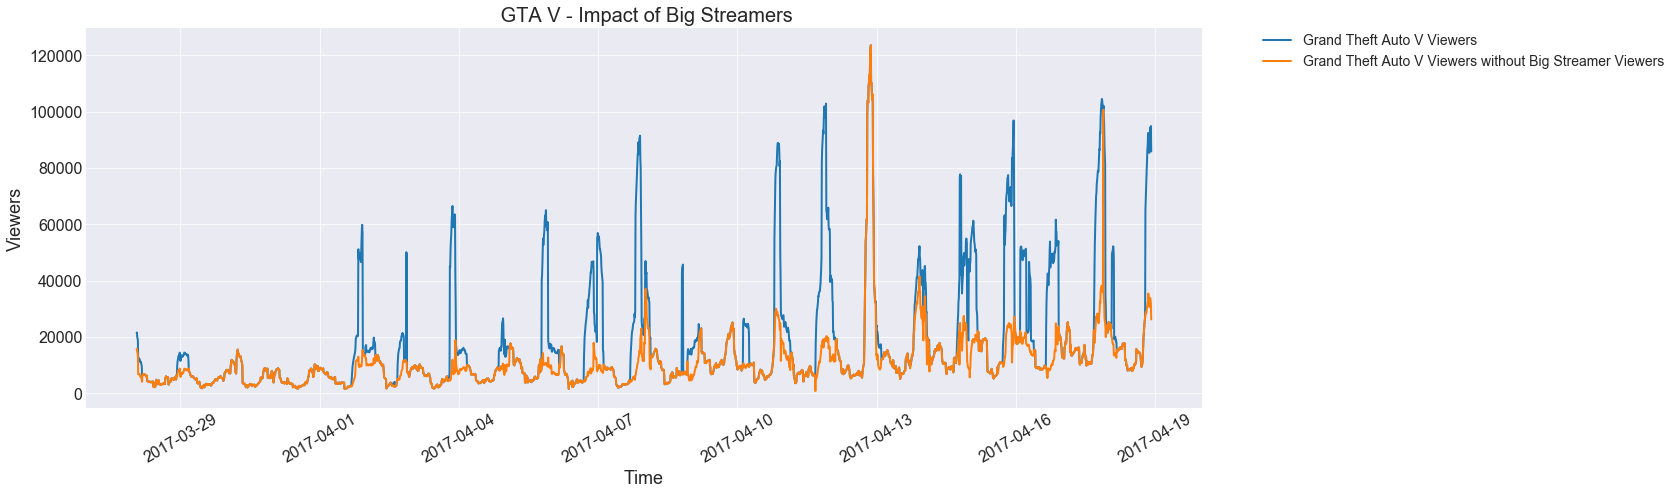

In [49]:
plt.figure(figsize = (20,7))

plt.plot(anotherDF['time'],anotherDF['viewers'].values, label = "Grand Theft Auto V Viewers")
plt.plot(anotherDF['time'],np.abs(np.array(mainVals)-np.array(summitVals)-np.array(lirikVals)- np.array(giantwaffleVals)- np.array(aiekilluVals)), label = "Grand Theft Auto V Viewers without Big Streamer Viewers")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
labels = plt.gca().get_xticklabels()
plt.setp(labels, rotation=30)
plt.title(" GTA V - Impact of Big Streamers")
plt.xlabel("Time")
plt.ylabel("Viewers")
plt.show()
    

While it was the case for GTA V that the game's viewership spiked tremendously with the appearance of large streamers, we hypothesized that the converse may also be true for certain popular games, i.e. that people will continue to watch the game even if the big streamers are not streaming it.

We considered the game 'PLAYERUNKNOWN'S BATTLEGROUNDS' (PUBG), which recently gained popularity and is actively streamed by both summit1g and lirik and created a similar plot to above. What we saw was that while these 2 do have a considerable impact on the viewership of the game, it is nowhere near the impact size that we saw previously. For GTA V they were raising the numbers from ~5000 to ~60000 (1100% increase), whereas for PUBG the impact size was in the range of 20-50%.

In [50]:
#counter example for streamers creating viewership

summitDF = dfBig.loc[dfBig["ch_channel_name"]=="summit1g"]
summitDF = summitDF.loc[summitDF["stream_game"]== "PLAYERUNKNOWN'S BATTLEGROUNDS"]

lirikDF = dfBig.loc[dfBig["ch_channel_name"]=="lirik"]
lirikDF = lirikDF.loc[lirikDF["stream_game"]== "PLAYERUNKNOWN'S BATTLEGROUNDS"]

thisDF = df.loc[df['name'] == "PLAYERUNKNOWN'S BATTLEGROUNDS"]
#thisDF = thisDF.loc[thisDF['timestamp']< 1491436800]
anotherDF =thisDF


mainVals =[]
summitVals =[]
lirikVals = []

anotherDFTimeStamps = anotherDF["timestamp"].values
for i in range(0,len(anotherDFTimeStamps)):
    thismainVal =  anotherDF.loc[anotherDF["timestamp"]== anotherDFTimeStamps[i]]["viewers"].values[0]
    thissummitVal =  summitDF.loc[summitDF["timestamp"]== anotherDFTimeStamps[i]]["viewers"].values
    thislirikVal = lirikDF.loc[lirikDF["timestamp"]== anotherDFTimeStamps[i]]["viewers"].values
    if(len(thissummitVal)==0):
        thissummitVal =0
    else:
        thissummitVal=thissummitVal[0]
    if(len(thislirikVal)==0):
        thislirikVal =0
    else:
        thislirikVal=thislirikVal[0]

    mainVals.append(thismainVal)
    summitVals.append(thissummitVal)
    lirikVals.append(thislirikVal)

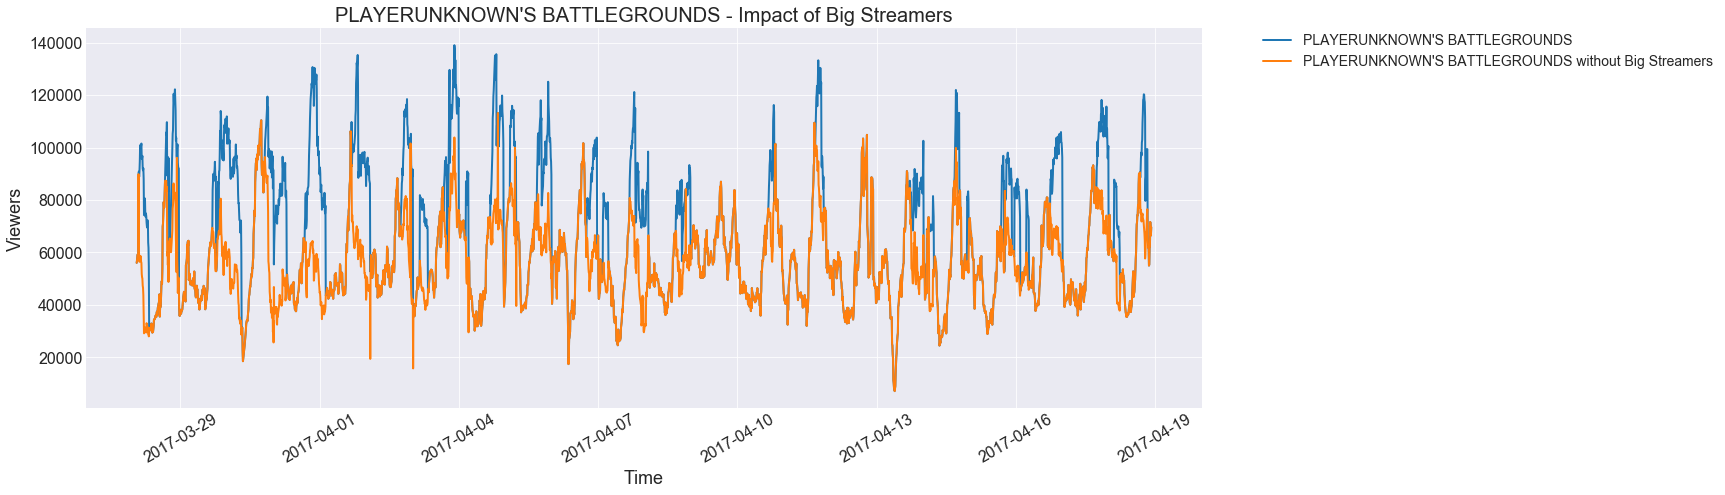

In [51]:
plt.figure(figsize = (20,7))
plt.plot(anotherDF['time'],np.array(mainVals), label = "PLAYERUNKNOWN'S BATTLEGROUNDS")
plt.plot(anotherDF['time'],np.abs((np.array(mainVals)-np.array(summitVals)-np.array(lirikVals))), label = "PLAYERUNKNOWN'S BATTLEGROUNDS without Big Streamers")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
labels = plt.gca().get_xticklabels()
plt.setp(labels, rotation=30)
plt.title("PLAYERUNKNOWN'S BATTLEGROUNDS - Impact of Big Streamers")
plt.xlabel("Time")
plt.ylabel("Viewers")
plt.show()
    

## Stream viewership by Day of Week and Hour of Day

After looking at the cyclical nature of overall viewership, we decided to aggregate our data by Day Of Week/Hour Of Day and look at pockets of time that correspond to high viewership through a heatmap.

Below we see that for "PLAYERUNKNOWN'S BATTLEGROUNDS", the viewership is concentrated in the late evening/late night time periods (in UTC time), meaning that the bulk of the player base is probably in the USA.

<img src="report-assets/overwatch.png" width="200px;"/>

On the other hand, if we look at the game "Overwatch", we had prior knowledge that the game has a big Korean community that streams on twitch. If we look at the heatmap faceted by language (english streams and korean streams), we can see the diffence in the time windows for high viewership. We also see a large hot spot on Saturdays, this was caused by a tournament\* that occured in Korea during the time we collected the data.

*- http://www.gosugamers.net/overwatch/events/632-ogn-overwatch-apex-season-2


In [52]:
#are there games that peak at different time periods?
heatMapGameList = ["PLAYERUNKNOWN'S BATTLEGROUNDS"]

thisDF = df.loc[df['name'].isin(heatMapGameList)]
#aggregate data by hour of day/day of week
thisDF["Hour"] = thisDF["time"].dt.hour
thisDF["DOW"] = thisDF["time"].dt.dayofweek

f = {'viewers':['mean'], 'name':sole_value, 'DOW': sole_value, 'Hour': sole_value}

thisSubGroup= thisDF.groupby(['DOW', 'Hour','name']).agg(f)
thisDF = pd.DataFrame(thisSubGroup)
thisDF.columns = ["hour", "name", "viewersMean", "dow"]
neededdf = thisDF

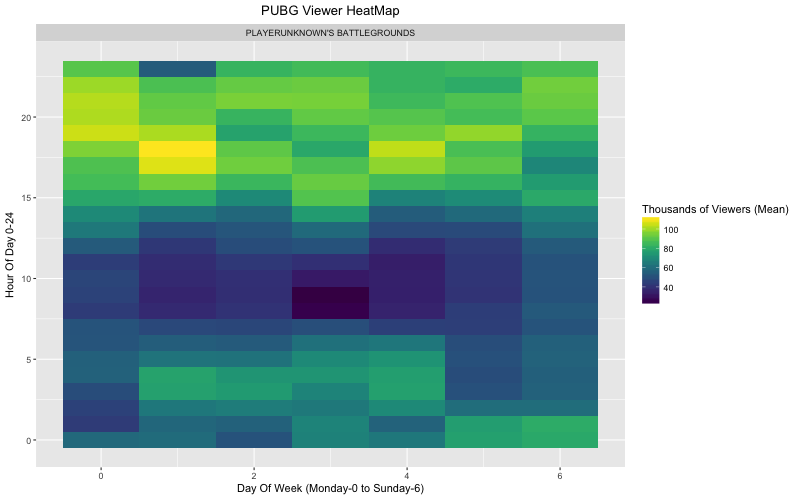

In [53]:
%%R -i neededdf -w 800 -h 500

library(ggplot2)
library(viridis)
neededdf <- as.data.frame(neededdf)


#divide by max scaler
#neededdf$viewers= neededdf$viewers/max(neededdf$viewers)
ggplot(data = neededdf, aes(x = dow, y = hour)) +
  geom_tile(aes(fill = viewersMean/1000)) + 
  scale_fill_viridis(name = "Thousands of Viewers (Mean)") +
 labs(title="PUBG Viewer HeatMap", x= "Day Of Week (Monday-0 to Sunday-6)", y = "Hour Of Day 0-24") +
  theme(plot.title = element_text(hjust = 0.5))+ 
 facet_wrap(~name)

In [54]:
#are there games that peak at different time periods? show heatmap faceted by language
sole_value = lambda x : list(x)[0]

thisDF = dfBig[dfBig['stream_game'] == "Overwatch"]

#aggregate data by hour of day/day of week
thisDF["Hour"] = thisDF["time"].dt.hour
thisDF["DOW"] = thisDF["time"].dt.dayofweek

f = {'viewers':['sum','count', 'mean'], 'ch_broadcaster_language':sole_value, 'DOW': sole_value, 'Hour': sole_value}

thisSubGroup= thisDF.groupby(['stream_game','DOW', 'Hour','ch_broadcaster_language']).agg(f)
thisDF = pd.DataFrame(thisSubGroup)


#thisDF.loc[thisDF["ch_broadcaster_language"]=="ko"]]
neededdf = thisDF.loc[thisDF["ch_broadcaster_language"]["<lambda>"]=="ko"]
neededdf= neededdf.append(thisDF.loc[thisDF["ch_broadcaster_language"]["<lambda>"]=="en"])
neededdf.columns = ["hour", "language", "dow", "viewersSum", "viewersCount", "viewersMean"]

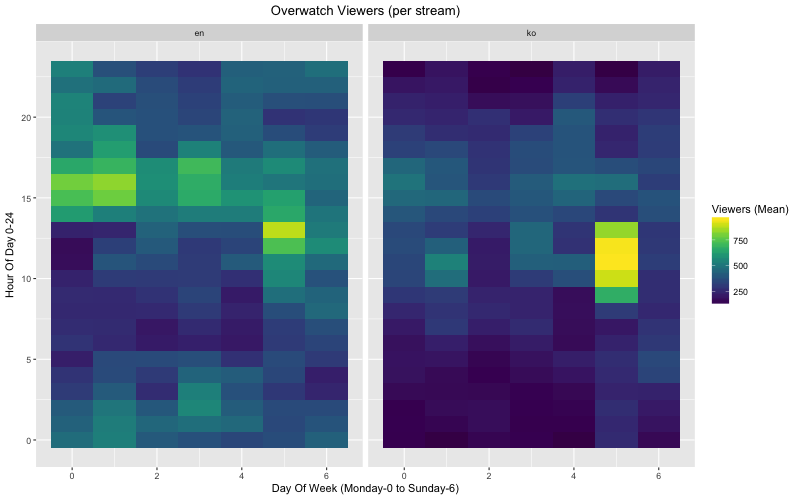

In [55]:
%%R -i neededdf -w 800 -h 500

library(ggplot2)
library(viridis)
neededdf <- as.data.frame(neededdf)
head(neededdf)

#divide by max scaler
#neededdf$viewers= neededdf$viewers/max(neededdf$viewers)

ggplot(data = neededdf, aes(x = dow, y = hour)) +
  geom_tile(aes(fill = viewersMean)) + 
  scale_fill_viridis(name = "Viewers (Mean)") +
labs(title="Overwatch Viewers (per stream)", x= "Day Of Week (Monday-0 to Sunday-6)", y = "Hour Of Day 0-24") +
  theme(plot.title = element_text(hjust = 0.5))+ facet_wrap(~language)


To better illustrate how viewership varies over time in various time zones around the world, we used D3 to create the below visualizations.

### Analyzing stream viewership by time of day - globally

While analyzing viewership for different streams, we looked at when certain game streams achieve their 'peaks'. We found some interesting insights by looking at this data, and overlaying it with the time of day around the world. Twitch is used worldwide and games are streamed from across the world. Below, we analyze two games showing different patterns.

- FIFA 17

- Dota 2

Since viewership varies across the world, we decided to make an interactive graph to visualize this using D3js and C3js libraries.

Relevant Credits:

 - http://bl.ocks.org/mbostock/4597134
 - https://gist.github.com/johan/4645501
 - http://c3js.org/

<img style="height:300px;" src="report-assets/fifa-17.png"/>

#### FIFA 17 

FIFA 17 is a soccer game, and soccer as a sport and a video game is more popular across Europe. What we find is that FIFA 17 streams reach peak viewership during late-evenings and night time in Europe. This could be due to the fact that people are coming home from work/college to play FIFA. 

##### INTERACTIVE VISUALIZATION:
*Note: Hover over the timeseries graph below to see the daylight overlay move across the world-map. The dark-gray region shows the part of the world that has night time.*

In [56]:
from IPython.display import IFrame

from IPython.display import HTML

HTML('''<style>
    #frame { width: 1000px; height:800px; border: 1px solid black; }
    #frame {
        -ms-zoom: 0.95;
        -moz-transform: scale(0.95);
        -moz-transform-origin: 0 0;
        -o-transform: scale(0.95);
        -o-transform-origin: 0 0;
        -webkit-transform: scale(0.95);
        -webkit-transform-origin: 0 0;
    }
</style>

<div id="wrap">
<iframe id="frame" src="http://cyruslala.github.io/EDAV_Columbia2017_Twitch/d3/fifaindex.html"></iframe>
</div>

''')

<img  src="report-assets/dota.png"/>





#### Dota 2:

Dota 2 is a popular 'moba' played across the world. There are concentrated player bases in the US, Europe and Asia. 

Again, this is visible clearly in the Daylight map overlay below.

##### INTERACTIVE VISUALIZATION:

*Note: Hover over the timeseries graph below to see the daylight overlay move across the world-map. The dark-gray region shows the part of the world that has night time.*

In [57]:
HTML('''<style>
    #frame { width: 1000px; height:800px; border: 1px solid black; }
    #frame {
        -ms-zoom: 0.95;
        -moz-transform: scale(0.95);
        -moz-transform-origin: 0 0;
        -o-transform: scale(0.95);
        -o-transform-origin: 0 0;
        -webkit-transform: scale(0.95);
        -webkit-transform-origin: 0 0;
    }
</style>

<div id="wrap">
<iframe id="frame" src="http://cyruslala.github.io/EDAV_Columbia2017_Twitch/d3/dotaindex.html"></iframe>
</div>

''')

Apart from some outliers, we noticed that there are multiple peaks in viewership per-day for Dota. These seem to occur during night time in US and Europe. This can be observed as a plateau of peak viewership as night progresses in Europe and Asia.

However there is clearly a huge spike in viewership for Dota 2 from  *1st April to 4th April*. Additionally, the peaks for these times occur when it is day time in China. 

<img src="report-assets/dota-tournament.png" width="600px"/>

Digging deeper, we found that there was a Dota 2 tournament held in China during these days. The finals of the tournament was on the *4th of April*. This is another graph that emphasises how viewership on Twitch skyrockets during large eSports tournaments. 

Read more about the tournament <a href="http://www.dota2.com.cn/dac/english/match?date=04-01">here.</a>

### How quickly do channels reach 'peak' viewership?

Looking at how well the peaks of big streamers corresponded to peaks of viewership in our GTA V analysis, we wanted to explore the question of how quickly the big streamers reach their peaks from the time they start streaming.

When a streamer goes online, all of their followers recieve a notification via email informing them that the streamer has gone live. Below, we once again look at the time series data for lirik and summit1g.

In [58]:
#how quickly do big streamers reach their peaks when they start streaming?

lirikTimeDF = dfBig.loc[dfBig["ch_channel_name"]=="lirik"][50:313]
summitTimeDF = dfBig.loc[dfBig["ch_channel_name"]=="summit1g"][200:730]

lirikTimeDF = lirikTimeDF.set_index("time")
lirikTimeDF = lirikTimeDF.resample("10 min")
lirikTimeDF= lirikTimeDF.mean()
lirikTimeDF['viewers'] = lirikTimeDF['viewers'].fillna(0)
lirikTimeDF= lirikTimeDF.iloc[50:].iloc[:-5]

summitTimeDF = summitTimeDF.set_index("time")
summitTimeDF = summitTimeDF.resample("10 min")
summitTimeDF= summitTimeDF.mean()
summitTimeDF['viewers'] = summitTimeDF['viewers'].fillna(0)
summitTimeDF= summitTimeDF.iloc[50:].iloc[:-50]


For lirik we see that typically he very quickly reaches a large amount of viewers (10 or 20 minutes), and then somtimes builds up over time. Looking a bit deeper, we found that the secondary spikes usually corresponded to him switching to more popular games and quickly gaining more viewers in that way.

The data point around 2nd april was actually him participating in a talk show with a scheduled start time, which could explain the immediate reaching of the peak.

Below we zoom in on his first stream in this data to illustrate the quick rise once he starts (basically reaches the peak within 20 minutes).

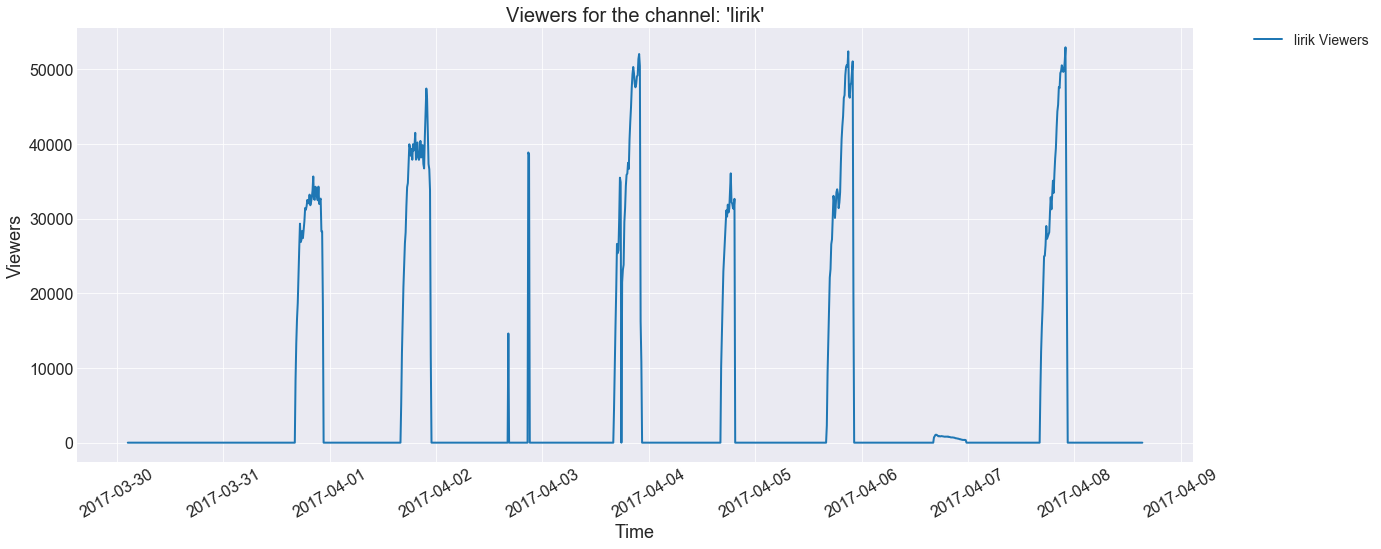

In [59]:
plt.figure(figsize=(20,8))
plt.plot(list(lirikTimeDF.index),lirikTimeDF['viewers'].values, label = "lirik Viewers")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

handles, labels = plt.gca().get_legend_handles_labels()

labels = plt.gca().get_xticklabels()
plt.setp(labels, rotation=30)
plt.title("Viewers for the channel: 'lirik'")
plt.xlabel("Time")
plt.ylabel("Viewers")
plt.show()

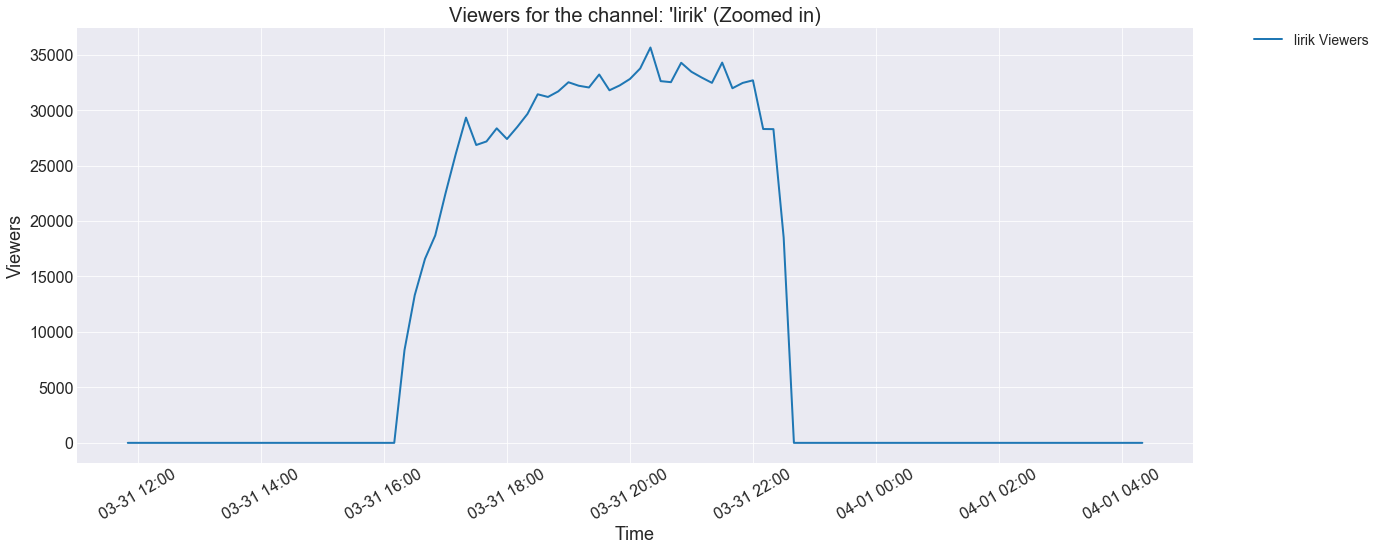

In [60]:
slopeDF = lirikTimeDF[200:300]
plt.figure(figsize=(20,8))
plt.plot(list(slopeDF.index),slopeDF['viewers'].values, label = "lirik Viewers")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

handles, labels = plt.gca().get_legend_handles_labels()

labels = plt.gca().get_xticklabels()
plt.setp(labels, rotation=30)
plt.title("Viewers for the channel: 'lirik' (Zoomed in)")
plt.xlabel("Time")
plt.ylabel("Viewers")
myFmt = mdates.DateFormatter('%m-%d %H:00')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.show()

For summit1g we see slightly slower rises, but we also see wider ranges of activity, showing that his streams are slightly longer.

One possible explanation is also that summit is attracting new viewers recently that are not part of his previous follower base and they trickle in slower as he continues to stream.

Once again, we zoom in on the first period of activity to better illustrate the timing window.

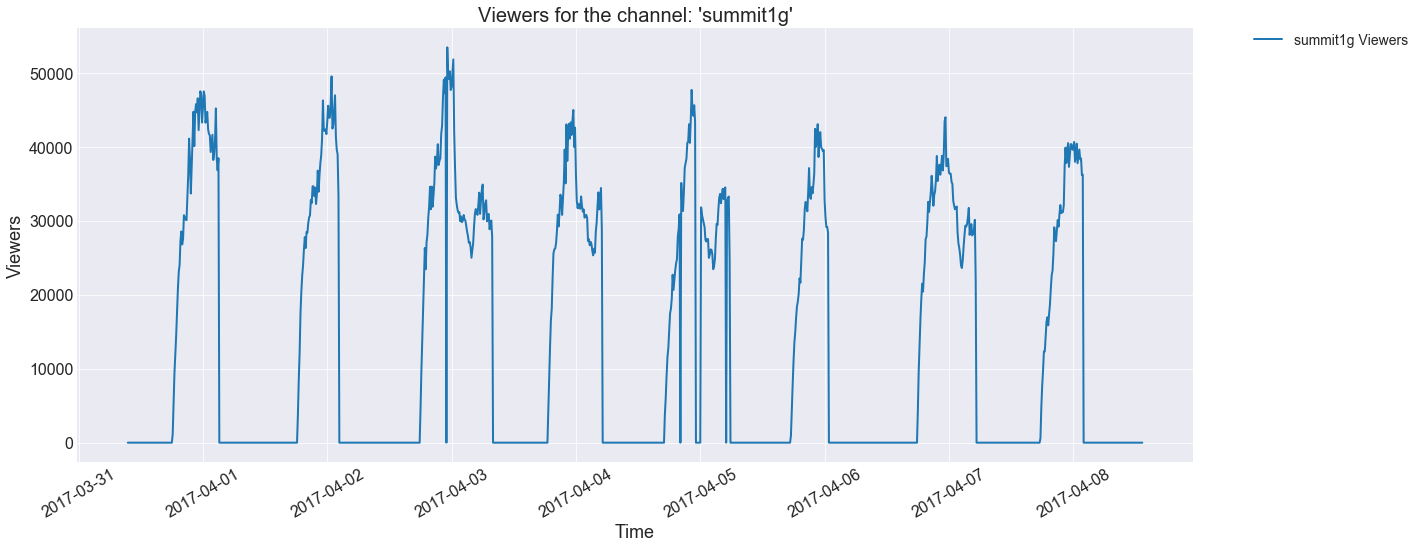

In [61]:
plt.figure(figsize=(20,8))
plt.plot(list(summitTimeDF.index),summitTimeDF['viewers'].values, label = "summit1g Viewers")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

handles, labels = plt.gca().get_legend_handles_labels()

labels = plt.gca().get_xticklabels()
plt.setp(labels, rotation=30)
plt.title("Viewers for the channel: 'summit1g'")
plt.xlabel("Time")
plt.ylabel("Viewers")
plt.show()

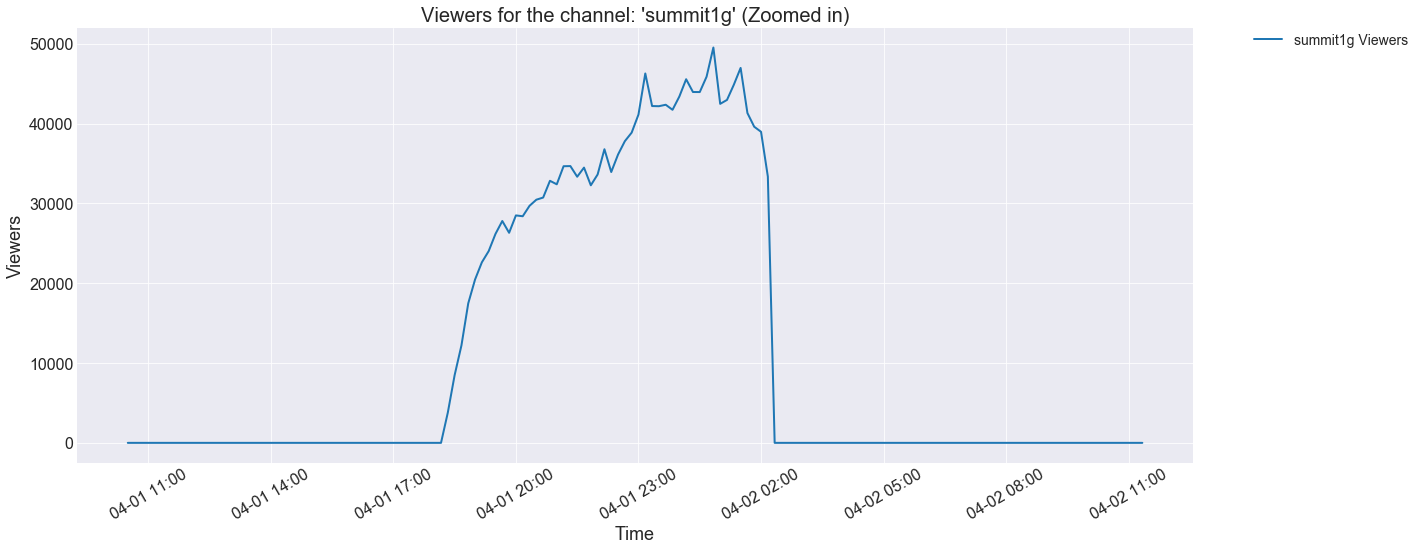

In [62]:
slopeDF = summitTimeDF[150:300]
plt.figure(figsize=(20,8))
plt.plot(list(slopeDF.index),slopeDF['viewers'].values, label = "summit1g Viewers")
myFmt = mdates.DateFormatter('%m-%d %H:00')
plt.gca().xaxis.set_major_formatter(myFmt)

handles, labels = plt.gca().get_legend_handles_labels()
labels = plt.gca().get_xticklabels()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(labels, rotation=30)
plt.title("Viewers for the channel: 'summit1g' (Zoomed in)")
plt.xlabel("Time")
plt.ylabel("Viewers")
plt.show()

### How does FPS (Frames Per Second) and Video Resolution Affect Viewership?

We observe that the majority of streamer's FPS is either 30 or 60. High frame rate does not correspond to high viewership, but streamers with high viewership have between the standard 30 and 60 fps.

We observe a similar pattern for video resolution, with concentrations around 720 and 1080. Once again, high resolution does not necessarily correspond to high viewership, but streamers with high viewership generally have good screen resolution between 720 and 1080.

In [63]:
#How does FPS affect viewership
sole_value = lambda x : list(x)[0]

thisDF = dfBig

#aggregate data by hour of day/day of week
thisDF["Hour"] = thisDF["time"].dt.hour
thisDF["DOW"] = thisDF["time"].dt.dayofweek

f = {'viewers':['median','count'],'stream_game':sole_value, 'ch_channel_name':sole_value, 'average_fps':'mean', 'video_height':'mean'}

thisSubGroup= thisDF.groupby(['stream_game','ch_channel_name']).agg(f)
thisDF = pd.DataFrame(thisSubGroup)
#neededdf["DOW"] = neededdf.index[:][0]
#neededdf["Hour"] = 
#neededdf["ch_language"]



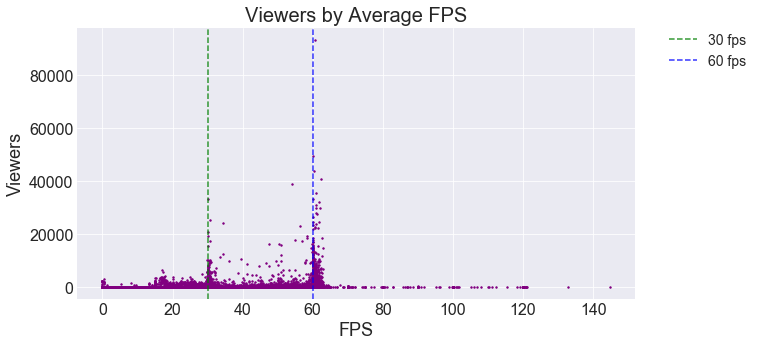

In [64]:
#thisDF['viewers'].values[:,0]
thisDF = thisDF.loc[thisDF['average_fps']['mean'].values<200]
#thisDF['average_fps']['mean']
plt.figure(figsize = (10,5))
plt.scatter(thisDF['average_fps'].values,thisDF['viewers'].values[:,0],s =2,c='purple')
plt.axvline(30, color='green', linestyle='--', alpha=0.6, label = '30 fps')
plt.axvline(60, color='blue', linestyle='--', alpha=0.6, label = '60 fps')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Viewers by Average FPS")
plt.xlabel("FPS")
plt.ylabel("Viewers")
plt.show()

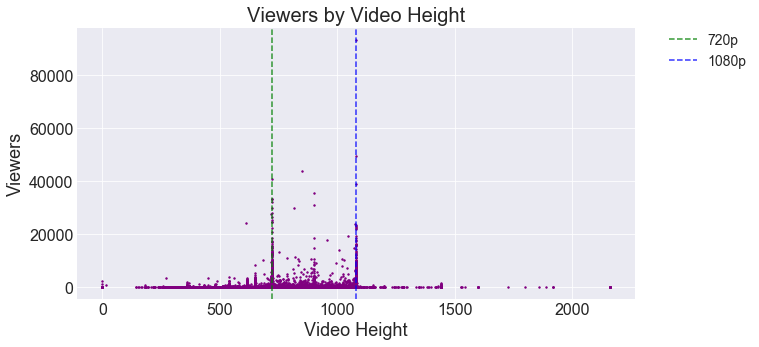

In [65]:
#thisDF['viewers'].values[:,0]
#thisDF = thisDF.loc[thisDF['video_height']['mean'].values<200]
#thisDF['average_fps']['mean']
plt.figure(figsize = (10,5))
plt.scatter(thisDF['video_height'].values,thisDF['viewers'].values[:,0],s =2,c='purple')
plt.axvline(720, color='green', linestyle='--', alpha=0.6, label = '720p')
plt.axvline(1080, color='blue', linestyle='--', alpha=0.6, label = '1080p')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Viewers by Video Height")
plt.xlabel("Video Height")
plt.ylabel("Viewers")
plt.show()

## 6. Conclusion

The analysis of data from Twitch revealed a lot of insights regarding viewership. However, the limitations, future directions and lessons learnt are listed below:

* **Limitations**

    - One of the major limitations of our analysis is the missing unique viewer information per 10-minute time interval. We had to aggregate data every hour by taking the mean viewership in that hour, which is not very accurate.

    - We have no information about the age/demographics of the viewers.


* **Future Directions**

    - This data could be used by either game designers or streamers. They could use the insights to uncover what drives interest in games.

    - This analysis can be repeated for other video based/ view-based social networks or platforms.


* **Lessons Learnt**

    - We learnt how to setup machines on Amazon AWS - EC2 & RDS to fetch/save data.
    - We learnt how to interoperate between Python and R.
    - We learnt how to deal with large files (~2GB) in Python and R.

## Instructions to run the code:

- Required: Python 2.7, Latest version of R (RStudio).

- Dependencies: Numpy, Pandas, rpy2, matplotlib, scipy 

- Data: Hosted on Google Drive (https://drive.google.com/drive/folders/0B_1PeBrwSWY1bUZLU3laSldEaWc?usp=sharing)

*Note:* Data is available to anyone with LionMail access.

- Data Fetch/Cleanup code: 
    * https://github.com/shashankrao/TwitchDataAnalysis/blob/master/notebooks-code/Giantbomb_Pull.ipynb
    * https://github.com/shashankrao/TwitchDataAnalysis/blob/master/notebooks-code/Giantbomb_Cleanup.ipynb
    * https://github.com/shashankrao/TwitchDataAnalysis/blob/master/notebooks-code/TwitchScraper.py
    
    
- Repository with everything: https://github.com/shashankrao/TwitchDataAnalysis